In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
from glob import glob
import os

In [7]:
sales_path = r'Data/Sales_snapshot_data'
inventory_path = r'Data/Inventory_snapshot_data'
all_sales_files = glob(os.path.join(sales_path , "*.xlsx"))
all_inventory_files = glob(os.path.join(inventory_path , "*.xlsx"))

# Load data from files into data frame

## 1. Sales And Inventory Data

In [8]:
li_sales = []

for filename in all_sales_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li_sales.append(df)

sales_frame = pd.concat(li_sales, axis=0, ignore_index=True)

li_inventory = []

for filename in all_inventory_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li_inventory.append(df)

inventory_frame = pd.concat(li_inventory, axis=0, ignore_index=True)

In [9]:
sales_frame.head()

,month,week,site,branch_id,channel_id,distribution_channel,distribution_channel_code,sold_quantity,cost_price,net_price,customer_id,product_id
0,2022001,202201,1800,1800,Online,Online,ZF2,1,495720,729000,9847d4248,d77fdd34a14845db97837e059b0aca00TRG42
1,2022001,202204,1116,1100,CHTT,Bán lẻ,FP,1,221000,325000,2384aef55,e485c0ab7b9b470cbddb80ea7367e734DEN40
2,2022001,202201,1134,1100,CHTT,Bán lẻ,FP,1,255000,375000,20c3e0442,ac88f78262ee4b589bc93b106b67af1dDEN42
3,2022001,202204,1612,1600,CHTT,Bán lẻ,FP,1,258400,380000,e8b42ff8f,920641c624934c4a8695347737f8f59dDEN35
4,2022001,202202,1511,1500,CHTT,Bán lẻ,FP,1,272000,400000,b8d51499a,6764565f4bb141138af7d9cbf0905d0dHOL33


In [10]:
sales_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831966 entries, 0 to 831965
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   month                      831966 non-null  int64 
 1   week                       831966 non-null  int64 
 2   site                       831966 non-null  int64 
 3   branch_id                  831966 non-null  int64 
 4   channel_id                 831966 non-null  object
 5   distribution_channel       831966 non-null  object
 6   distribution_channel_code  831966 non-null  object
 7   sold_quantity              831966 non-null  int64 
 8   cost_price                 831966 non-null  int64 
 9   net_price                  831966 non-null  int64 
 10  customer_id                831965 non-null  object
 11  product_id                 831966 non-null  object
dtypes: int64(7), object(5)
memory usage: 76.2+ MB


In [11]:
inventory_frame.head()

,Unnamed: 0,index,plant,calendar_year,calendar_yeer_week,sloc,quantity,total_amount,product_id
0,0,0,1201,2022,20220228,3000,19,0,1259098aaa8e447181f13903f84e5db1OOO35
1,1,1,1201,2022,20220228,3000,41,0,39b38616e4d649ab9c3b7d04e82e079fOOO36
2,2,2,1201,2022,20220228,3000,96,0,8db14e88898e40a392f80ed69c30e206OOO37
3,3,3,1201,2022,20220228,3000,87,0,7c15de90afd343338f93c8f65a0d8380OOO38
4,4,4,1201,2022,20220228,3000,104,0,6c04a173aec34690b242ed4e09367e96OOO39


In [12]:
inventory_frame = inventory_frame.loc[:, ~inventory_frame.columns.str.contains('^Unnamed')]
inventory_frame = inventory_frame.loc[:, ~inventory_frame.columns.str.contains('^index')]

In [13]:
inventory_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367080 entries, 0 to 1367079
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   plant               1367080 non-null  int64 
 1   calendar_year       1367080 non-null  int64 
 2   calendar_yeer_week  1367080 non-null  int64 
 3   sloc                1367080 non-null  object
 4   quantity            1367080 non-null  int64 
 5   total_amount        1367080 non-null  int64 
 6   product_id          1367080 non-null  object
dtypes: int64(5), object(2)
memory usage: 73.0+ MB


In [14]:
inventory_frame.head()

,plant,calendar_year,calendar_yeer_week,sloc,quantity,total_amount,product_id
0,1201,2022,20220228,3000,19,0,1259098aaa8e447181f13903f84e5db1OOO35
1,1201,2022,20220228,3000,41,0,39b38616e4d649ab9c3b7d04e82e079fOOO36
2,1201,2022,20220228,3000,96,0,8db14e88898e40a392f80ed69c30e206OOO37
3,1201,2022,20220228,3000,87,0,7c15de90afd343338f93c8f65a0d8380OOO38
4,1201,2022,20220228,3000,104,0,6c04a173aec34690b242ed4e09367e96OOO39


## 2. Master Data

In [15]:
#Data Path
cogs_path = r'Data\MasterData\COGS.xlsx'
distribution_channel_path = r'Data\MasterData\Distribution Channel.xlsx'
master_calendar_path = r'Data\MasterData\Master_Calendar.xlsx'
new_core_classification_path = r'Data\MasterData\New_Core_Classification.xlsx'
product_master_path = r'Data\MasterData\Productmaster.xlsx'
retail_price_path = r'Data\MasterData\Retail_price.xlsx'


In [16]:
#Load data into Df
df_cogs = pd.read_excel(cogs_path, index_col=0)
df_dischanel = pd.read_excel(distribution_channel_path, index_col=0)
df_master_calendar = pd.read_excel(master_calendar_path)
df_new_core_classification = pd.read_excel(new_core_classification_path, index_col=0)
df_product_master = pd.read_excel(product_master_path, index_col=0)
df_retail_price = pd.read_excel(retail_price_path, index_col=0)

### COGS

In [17]:
df_cogs.head()

,amount,valid_from,valid_to,product_id
index,,,,
0,50000,23.12.2021,31.01.2023,904de55fb0ca414cb86b2e466c9d74c1OOO00
1,50000,23.12.2021,31.01.2023,904de55fb0ca414cb86b2e466c9d74c1OOO00
2,479400,01.01.2023,07.02.2023,9e8ecc5d2b104d609e3b53c4724bc96aCAM39
3,479400,01.01.2023,07.02.2023,9225ed5b408343be98a4dc63d4027a26CAM40
4,479400,01.01.2023,07.02.2023,d1410b40bb004d1f9b2c2619d2c933f6CAM41


In [18]:
df_cogs.shape

(522675, 4)

In [19]:
df_cogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522675 entries, 0 to 522674
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   amount      522675 non-null  int64 
 1   valid_from  522675 non-null  object
 2   valid_to    522675 non-null  object
 3   product_id  522675 non-null  object
dtypes: int64(1), object(3)
memory usage: 19.9+ MB


- The "cogs" table comprises 522,675 rows and 4 columns.
- The "cogs" table records the cost of goods sold (COGS) for products, where "amount" represents the cost, "valid from" and "valid to" are corresponding time intervals, and "product_id" is the identifier for that product. The "ID" column can be used to map and obtain the necessary information.

### Distribution Channel

In [20]:
df_dischanel.head()

,index,site_store,b2b_b2c,channel_id,region,city_level,store_concept,trade_term,area_range,store_type,...,address_3,showroom_area,warehouse_area,start_month,start_year,end_month,end_year,note,customer_id,customer_name
0,0,60000003,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,NaN,NaN,NaN,435043cf9,customer878
1,1,60000006,B2B,ST,KVMN,Cấp 2,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,ĐNI,NaN,NaN,8,2010,NaN,NaN,NaN,db3c83bfa,customer904
2,2,60000007,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,NaN,NaN,NaN,f9bd8e994,customer1213
3,3,60000008,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,NaN,NaN,NaN,c6fb2b695,customer1792
4,4,60000534,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,NaN,NaN,NaN,68be208f8,customer463


In [21]:
df_dischanel.shape

(3405, 23)

In [22]:
df_dischanel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3405 entries, 0 to 3404
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           3405 non-null   int64 
 1   site_store      3405 non-null   int64 
 2   b2b_b2c         3405 non-null   object
 3   channel_id      3405 non-null   object
 4   region          3405 non-null   object
 5   city_level      3405 non-null   object
 6   store_concept   3403 non-null   object
 7   trade_term      3405 non-null   object
 8   area_range      464 non-null    object
 9   store_type      3405 non-null   object
 10  urbanization    3405 non-null   object
 11  branch_area     3405 non-null   object
 12  address_2       3403 non-null   object
 13  address_3       3403 non-null   object
 14  showroom_area   470 non-null    object
 15  warehouse_area  456 non-null    object
 16  start_month     3376 non-null   object
 17  start_year      3376 non-null   object
 18  end_mont

In general, the Distribution_channel table contains information about distribution channels, wherein numerical data includes:
- `index` and `site_store`` may contain information about the index and store code.
- Categorical variables include: `b2b_b2c`, `channel_id`, `region`, `city_level`, `store_concept`, `trade_term`, `area_range`, `store_type`, `urbanization`, `branch_area`, `start_month`, `start_year`, `end_month`, and `end_year`.
- Text data variables include: `address_2`, `address_3`, `note`, `customer_name`.
- Potential foreign key variable: `customer_id`.
- Time-based variables: `start_month`, `start_year`, `end_month`, `end_year`.
 

In [23]:
df_dischanel[['start_month','start_year', 'end_month','end_year' ]]

,start_month,start_year,end_month,end_year
0,8,2010,NaN,NaN
1,8,2010,NaN,NaN
2,8,2010,NaN,NaN
3,8,2010,NaN,NaN
4,8,2010,NaN,NaN
...,...,...,...,...
3400,9,2023,NaN,0
3401,9,2023,NaN,0
3402,9,2023,NaN,0
3403,9,2023,NaN,0


The absence of data in the end_month indicates that there is currently no end date for the usage of that distribution channel. However, the `end_year` variable contains values of "0".

In [24]:
df_dischanel[['start_month','start_year', 'end_month','end_year' ]].describe()

,start_month,start_year,end_month,end_year
count,3376,3376,1927,1941
unique,13,36,14,12
top,11,2010,Closed,Closed
freq,897,1025,1694,1528


In [25]:
df_dischanel['end_year' ].unique()

array([nan, 2020, 2018, 'Closed', '2020', '2017', 2021, 2019, 2022, 2010,
       2023, 0, '0'], dtype=object)

It can be observed that the data in the `end_year` is not well standardized. Some columns record years, while others are marked as "close." Additionally, there are some null values, some are represented as 0 (integer), and others as 0 (string). Therefore, further investigation is needed to understand the significance of these data points.

In [26]:
df_dischanel[df_dischanel['end_year'] == 0].head()

,index,site_store,b2b_b2c,channel_id,region,city_level,store_concept,trade_term,area_range,store_type,...,address_3,showroom_area,warehouse_area,start_month,start_year,end_month,end_year,note,customer_id,customer_name
3346,3346,60003985,B2B,TGPP,KVMT,Cấp 1,Đại lý,Mua đứt bán đoạn,NaN,Độc lập,...,CTƠ,NaN,NaN,1,2023,NaN,0,NaN,267145c29,customer1791
3347,3347,60003986,B2B,TGPP,KVMB,Cấp TW,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,HNI,NaN,NaN,1,2023,NaN,0,NaN,fb604416f,customer1778
3400,3400,60004071,B2B,TGPP,KVMB,Còn lại,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,HYN,NaN,NaN,9,2023,NaN,0,NaN,411920d55,customer1707
3401,3401,60004072,B2B,TGPP,KVMN,Còn lại,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,TTH,NaN,NaN,9,2023,NaN,0,NaN,a5e95c0dc,customer1186
3402,3402,60004073,B2B,TGPP,KVMB,Cấp TW,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,HNI,NaN,NaN,9,2023,NaN,0,NaN,f553026ed,customer788


In [27]:
df_dischanel[df_dischanel['end_year'] == '0'].head()

,index,site_store,b2b_b2c,channel_id,region,city_level,store_concept,trade_term,area_range,store_type,...,address_3,showroom_area,warehouse_area,start_month,start_year,end_month,end_year,note,customer_id,customer_name
3390,3390,20000301,B2B,ST,KVCA,Cấp 1,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Độc lập,...,Campuchia,NaN,NaN,6,2023,NaN,0,NaN,08cd194ae,customer118
3391,3391,60004054,B2B,TGPP,KVMB,Cấp TW,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,HNI,NaN,NaN,7,2023,NaN,0,NaN,f75387433,customer1675
3392,3392,60004055,B2B,TGPP,KVMN,Còn lại,Đại lý,Mua đứt bán đoạn,NaN,Độc lập,...,TGG,NaN,NaN,8,2023,NaN,0,NaN,69191f8cc,customer732
3393,3393,60004056,B2B,TGPP,KVMB,Cấp TW,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,HNI,NaN,NaN,8,2023,NaN,0,NaN,062dfa70f,customer1362
3394,3394,60004057,B2B,TGPP,KVMN,Cấp TW,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,HCM,NaN,NaN,8,2023,NaN,0,NaN,c26ffffe1,customer552


In [28]:
df_dischanel[df_dischanel['end_year'].isnull()].head()

,index,site_store,b2b_b2c,channel_id,region,city_level,store_concept,trade_term,area_range,store_type,...,address_3,showroom_area,warehouse_area,start_month,start_year,end_month,end_year,note,customer_id,customer_name
0,0,60000003,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,NaN,NaN,NaN,435043cf9,customer878
1,1,60000006,B2B,ST,KVMN,Cấp 2,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,ĐNI,NaN,NaN,8,2010,NaN,NaN,NaN,db3c83bfa,customer904
2,2,60000007,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,NaN,NaN,NaN,f9bd8e994,customer1213
3,3,60000008,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,NaN,NaN,NaN,c6fb2b695,customer1792
4,4,60000534,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,NaN,NaN,NaN,68be208f8,customer463


In [29]:
df_dischanel[df_dischanel['end_year'] == 'Closed'].head()

,index,site_store,b2b_b2c,channel_id,region,city_level,store_concept,trade_term,area_range,store_type,...,address_3,showroom_area,warehouse_area,start_month,start_year,end_month,end_year,note,customer_id,customer_name
192,192,60000544,B2B,ST,KVMN,Còn lại,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,Closed,NaN,NaN,8,2010,Closed,Closed,NaN,dd72820f6,customer1518
193,193,60001398,B2B,ST,KVMN,Còn lại,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,Closed,NaN,NaN,12,2010,Closed,Closed,NaN,7c8c23cf7,customer677
194,194,60001408,B2B,ST,KVMN,Còn lại,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,Closed,NaN,NaN,12,2010,Closed,Closed,NaN,ef5905ec6,customer302
195,195,60002205,B2B,ST,KVMN,Còn lại,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,Closed,NaN,NaN,3,2012,Closed,Closed,NaN,7ba4d4651,customer1715
196,196,60002222,B2B,ST,KVMN,Còn lại,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,Closed,NaN,NaN,5,2012,Closed,Closed,NaN,bbd50f365,customer811


- It can be observed that Null values, 0 (int), and 0 (string) all indicate a common value, signifying that the channel is still in use and has not been terminated.
- The term "Close" may represent a distribution channel that has been terminated, with the exact termination date not clearly specified.

In [30]:
df_dischanel['end_month'].unique()

array([nan, 1, 'Closed', 8, 'closed', 7, 10, 3, 5, 4, 2, 6, 9, 11, 12],
      dtype=object)

In [31]:
df_dischanel[(df_dischanel['end_year'] == 'Closed') | (df_dischanel['end_year'] == 'closed') ].tail()

,index,site_store,b2b_b2c,channel_id,region,city_level,store_concept,trade_term,area_range,store_type,...,address_3,showroom_area,warehouse_area,start_month,start_year,end_month,end_year,note,customer_id,customer_name
2485,2485,60000276,B2B,TGPP,KVMN,Còn lại,Cửa hàng chuyên doanh,Mua đứt bán đoạn,NaN,Độc lập,...,VTU,NaN,NaN,1,1998,Closed,Closed,NaN,285ca4d4c,customer1327
2686,2686,60001223,B2B,TGPP,KVMB,Còn lại,Đại lý,Mua đứt bán đoạn,NaN,Độc lập,...,HTH,NaN,NaN,7,1999,Closed,Closed,NaN,44f28fc8b,customer1153
3112,3112,20000255,B2B,TGPP,Trung Quốc,Còn lại,Đại lý,Mua đứt bán đoạn,NaN,Độc lập,...,Closed,NaN,NaN,11,2020,Closed,Closed,NaN,5ec03e1ae,customer1553
3117,3117,60003816,B2B,ST,KVMB,Còn lại,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,Closed,NaN,NaN,12,2020,Closed,Closed,NaN,bb1bd12cb,customer711
3118,3118,20000225,B2B,TGPP,Trung Quốc,Còn lại,Đại lý,Mua đứt bán đoạn,NaN,Độc lập,...,Closed,NaN,NaN,11,2019,Closed,Closed,NaN,0086cd855,customer650


In [32]:
df_dischanel[df_dischanel['end_year'].isnull()].tail()

,index,site_store,b2b_b2c,channel_id,region,city_level,store_concept,trade_term,area_range,store_type,...,address_3,showroom_area,warehouse_area,start_month,start_year,end_month,end_year,note,customer_id,customer_name
3386,3386,60004045,B2B,TGPP,KVMN,Cấp TW,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,HCM,NaN,NaN,7,2023,NaN,NaN,NaN,315ac5c10,customer233
3387,3387,60004046,B2B,TGPP,KVMN,Còn lại,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,KHA,NaN,NaN,7,2023,NaN,NaN,NaN,a5488a5c2,customer407
3388,3388,60004047,B2B,TGPP,KVMN,Cấp TW,"Các mã khách bán lưu động, khách sĩ vãng lại v...",Mua đứt bán đoạn,NaN,Độc lập,...,HNI,NaN,NaN,7,2023,NaN,NaN,NaN,6021800c8,customer144
3389,3389,20000300,B2B,ST,KVCA,Cấp 1,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Độc lập,...,Campuchia,NaN,NaN,6,2023,NaN,NaN,NaN,c8e32e3b1,customer118
3399,3399,1238,B2C,CHTT,KVMB,Còn lại,Cửa hàng B thông thường,Drop-ship,100 m2 < và <= 150 m2,Độc lâp,...,VPC,110,75.9,8,2023,NaN,NaN,NaN,caf5e8d76,customer159


In [33]:
def convert_time_col(txt):
    if txt == 'closed':
        return 'Closed'
    elif pd.isna(txt):
        return 0
    elif txt == '0':
        return 0
    return txt

df_dischanel['end_year'] = df_dischanel['end_year'].apply(convert_time_col)
df_dischanel['end_month'] = df_dischanel['end_month'].apply(convert_time_col)

- Close and close have the same meaning -> proposed to convert to a common data type for the `end_year` column

In [34]:
df_dischanel['end_year'].unique()

array([0, 2020, 2018, 'Closed', '2020', '2017', 2021, 2019, 2022, 2010,
       2023], dtype=object)

In [35]:
df_dischanel['end_month'].unique()

array([0, 1, 'Closed', 8, 7, 10, 3, 5, 4, 2, 6, 9, 11, 12], dtype=object)

### Master Calendar

In [36]:
df_master_calendar.head()

,Year,Month,Month_3Char,Week,YearWeek,Start Date,End Date,CNY
0,2016,1,1,1,201601,2016-01-04,2016-01-10,No
1,2016,1,1,2,201602,2016-01-11,2016-01-17,No
2,2016,1,1,3,201603,2016-01-18,2016-01-24,Yes
3,2016,1,1,4,201604,2016-01-25,2016-01-31,Yes
4,2016,2,2,5,201605,2016-02-01,2016-02-07,Yes


In [37]:
df_master_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         260 non-null    int64         
 1   Month        260 non-null    int64         
 2   Month_3Char  260 non-null    int64         
 3   Week         260 non-null    int64         
 4   YearWeek     260 non-null    int64         
 5   Start Date   260 non-null    datetime64[ns]
 6   End Date     260 non-null    datetime64[ns]
 7   CNY          260 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 16.4+ KB


In [38]:
from datetime import datetime, timedelta

def generate_master_calendar(start_year, end_year):
    """
    Generate a master calendar DataFrame from start_year to end_year.
    """
    # Initialize an empty DataFrame
    master_calendar = []

    # Iterate over years and weeks
    for year in range(start_year, end_year + 1):
        # Find the first Monday of the year or the last Monday of the previous year
        first_day_of_year = datetime(year, 1, 1)
        days_to_monday = (first_day_of_year.weekday() + 1) % 7
        first_monday = first_day_of_year - timedelta(days=days_to_monday)

        # Generate weeks for the year
        week_start = first_monday
        while week_start.year == year or (week_start.year == year - 1 and week_start.month == 12):
            week_end = week_start + timedelta(days=6)
            
            # Set the 'End Date' to the last day of the corresponding year
            end_of_year = datetime(week_start.year, 12, 31)
            end_date = min(week_end, end_of_year)

            week_number = week_start.isocalendar()[1]
            year_week = int(f"{year if week_start.year == year else year - 1}{week_number:02d}")

            # Populate the DataFrame
            master_calendar.append({
                'Year': week_start.year if week_start.year == year else year,
                'Month': week_start.month,
                'Month_3Char': week_start.strftime('%b'),
                'Week': week_number,
                'YearWeek': year_week,
                'Start Date': week_start,
                'End Date': end_date,
                'CNY': 'No'  # Placeholder for Chinese New Year, requires additional logic
            })

            week_start += timedelta(days=7)

    # Convert list of dictionaries to DataFrame
    return pd.DataFrame(master_calendar)

# Generate master calendar DataFrame from 2016 to 2025
master_calendar_df = generate_master_calendar(2016, 2025)
duplicates = master_calendar_df[master_calendar_df.duplicated(subset=['YearWeek'], keep=False)]

master_calendar_df = master_calendar_df.drop_duplicates(subset=['YearWeek'], keep='first')
sales_frame['week'] = sales_frame['week'].astype(str)
master_calendar_df['YearWeek'] = master_calendar_df['YearWeek'].astype(str)



The master data calendar table contains information about the week's key, which can be considered a Time dimension in a data warehouse

### New Core classification

In [39]:
df_new_core_classification.head()

,index,lauch_season,lauch_season_num,sales_season,sales_season_num,final_status,b2c_assortment,b2b_assortment,total_assortment,product_syle_color
0,0,NaN,0.0,17DE,1712.0,CORE,1.0,1.0,1.0,0e911e94ee4f4fbebcc4dca85e6496ebDOD
1,1,NaN,0.0,18AP,1804.0,CORE,1.0,1.0,1.0,0e911e94ee4f4fbebcc4dca85e6496ebDOD
2,2,NaN,0.0,18AU,1808.0,CORE,1.0,1.0,1.0,0e911e94ee4f4fbebcc4dca85e6496ebDOD
3,3,NaN,0.0,18DE,1812.0,CORE,1.0,1.0,1.0,0e911e94ee4f4fbebcc4dca85e6496ebDOD
4,4,NaN,0.0,19AP,1904.0,CORE,1.0,1.0,1.0,0e911e94ee4f4fbebcc4dca85e6496ebDOD


In [40]:
df_new_core_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150209 entries, 0 to 150208
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               150209 non-null  int64  
 1   lauch_season        128566 non-null  object 
 2   lauch_season_num    150193 non-null  float64
 3   sales_season        150193 non-null  object 
 4   sales_season_num    150193 non-null  float64
 5   final_status        122936 non-null  object 
 6   b2c_assortment      150193 non-null  float64
 7   b2b_assortment      150193 non-null  float64
 8   total_assortment    150193 non-null  float64
 9   product_syle_color  150176 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 12.6+ MB


In [41]:
df_new_core_classification.shape

(150209, 10)

In [42]:
df_new_core_classification.describe()

,index,lauch_season_num,sales_season_num,b2c_assortment,b2b_assortment,total_assortment
count,150209.00000,150193.000000,150193.000000,150193.000000,150193.000000,150193.000000
mean,75104.00000,1528.713189,2009.023803,0.308030,0.238187,0.431358
std,43361.74763,719.974267,171.519974,0.461681,0.425975,0.495268
min,0.00000,0.000000,1704.000000,0.000000,0.000000,0.000000
25%,37552.00000,1508.000000,1904.000000,0.000000,0.000000,0.000000
50%,75104.00000,1808.000000,2008.000000,0.000000,0.000000,0.000000
75%,112656.00000,2004.000000,2112.000000,1.000000,0.000000,1.000000
max,150208.00000,2408.000000,2308.000000,1.000000,1.000000,1.000000


- `index`: Row index in the DataFrame.
- `lauch_season`:  Launch season of the product.
- `lauch_season_num`: Số biểu diễn cho mùa ra mắt (có thể là mã số hoặc mã số được gán).
- `sales_season`: Sales season of the product.
- `sales_season_num`: Numeric representation of the sales season.
- `final_status`: Final status of a product.
- `b2c_assortment`: Retail assortment (B2C) indicating whether the product is available. 
- `b2b_assortment`:  Wholesale assortment (B2B) indicating whether the product is available.
- `total_assortment`: Total number of available product assortments (may be a binary variable or have values other than 1.0).
- `product_syle_color`: Code or numerical representation for the product style and color.

*In there*:
- Column `lauch_season` is missing a value (NaN).
- Column `final_status` contains the product's final status (CORE), which appears to be a categorical variable.
- The columns `b2c_assortment`, `b2b_assortment`, and `total_assortment` may be being used to represent different aspects of product classification.
- The `product_syle_color` column appears to be a numeric code or code representing the product style and color.

### Product Master

In [43]:
df_product_master.head()

,index,color,color_group,listing_price,price_group,gender,product_group,detail_product_group,shoe_product,size_group,...,mold_code,heel_height,code_lock,option,cost_price,product_id,product_syle_color,product_syle,brand_name,vendor_name
0,0,DEN,TỐI,255273.0,200<300,MEN,SAN,SANTD,STT,Ngoại lệ,...,DRB057,Đế Sẹp,x,P03-C05,176800.0,80e1107e5bf74598baffea3a7b6073c5DEN38,80e1107e5bf74598baffea3a7b6073c5DEN,80e1107e5bf74598baffea3a7b6073c5,Brand1,vendor0
1,1,DEN,TỐI,255273.0,200<300,MEN,SAN,SANTD,STT,Ngoại lệ,...,DRB057,Đế Sẹp,x,P03-C05,176800.0,c8223e6133a64491a006dc0f95c2bfd9DEN39,c8223e6133a64491a006dc0f95c2bfd9DEN,c8223e6133a64491a006dc0f95c2bfd9,Brand1,vendor0
2,2,DEN,TỐI,255273.0,200<300,MEN,SAN,SANTD,STT,Ngoại lệ,...,DRB057,Đế Sẹp,x,P03-C05,176800.0,bec30e131ee04e49a4c87bc56f135b13DEN40,bec30e131ee04e49a4c87bc56f135b13DEN,bec30e131ee04e49a4c87bc56f135b13,Brand1,vendor0
3,3,DEN,TỐI,255273.0,200<300,MEN,SAN,SANTD,STT,Ngoại lệ,...,DRB057,Đế Sẹp,x,P03-C05,176800.0,3f4e265b0ac740e9b9edfd23e0ba1ca5DEN41,3f4e265b0ac740e9b9edfd23e0ba1ca5DEN,3f4e265b0ac740e9b9edfd23e0ba1ca5,Brand1,vendor0
4,4,DEN,TỐI,255273.0,200<300,MEN,SAN,SANTD,STT,Ngoại lệ,...,DRB057,Đế Sẹp,x,P03-C05,176800.0,53e6284597944ec787e002b631391210DEN42,53e6284597944ec787e002b631391210DEN,53e6284597944ec787e002b631391210,Brand1,vendor0


In [44]:
df_product_master.describe()

,index,listing_price,size,cost_price
count,94867.000000,9.484000e+04,94722.000000,9.463200e+04
mean,47433.000000,2.386324e+05,35.429161,2.110151e+05
std,27385.888331,2.693594e+05,5.040262,1.784116e+05
min,0.000000,3.500000e+03,0.000000,2.450000e+03
25%,23716.500000,8.738200e+04,33.000000,1.122000e+05
50%,47433.000000,1.649450e+05,36.000000,1.632000e+05
75%,71149.500000,2.847270e+05,39.000000,2.380000e+05
max,94866.000000,5.889927e+06,47.000000,3.651755e+06


In [45]:
df_product_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94867 entries, 0 to 94866
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 94867 non-null  int64  
 1   color                 94822 non-null  object 
 2   color_group           94867 non-null  object 
 3   listing_price         94840 non-null  float64
 4   price_group           94840 non-null  object 
 5   gender                94867 non-null  object 
 6   product_group         94867 non-null  object 
 7   detail_product_group  94867 non-null  object 
 8   shoe_product          94867 non-null  object 
 9   size_group            94867 non-null  object 
 10  size                  94722 non-null  float64
 11  age_group             94867 non-null  object 
 12  activity_group        94867 non-null  object 
 13  image_copyright       94867 non-null  object 
 14  lifestyle_group       94688 non-null  object 
 15  launch_season      

In [46]:
df_product_master.columns

Index(['index', 'color', 'color_group', 'listing_price', 'price_group',
       'gender', 'product_group', 'detail_product_group', 'shoe_product',
       'size_group', 'size', 'age_group', 'activity_group', 'image_copyright',
       'lifestyle_group', 'launch_season', 'mold_code', 'heel_height',
       'code_lock', 'option', 'cost_price', 'product_id', 'product_syle_color',
       'product_syle', 'brand_name', 'vendor_name'],
      dtype='object')

- DataFrame has 94867 rows and 26 columns, showing that it is large in size and contains a lot of information.
- There are a variety of data types, including integers (`int64`), floats (`float64`), and strings (`object`).
- There are missing data in many columns such as `color`, `listing_price`, `size`, `color_group`, and others. Consideration needs to be given to how to handle missing data.
- Column `listing_price` has an average value of 238,632.4 and a maximum value of 5,889,927. The `size` column has an average value of 35.43 and a maximum value of 47.
- There are many categorical variables such as `color`, `color_group`, `gender`, `product_group`, and `launch_season`. Unique values and frequency of occurrence should be examined to better understand the diversity of the data.

### Retail Price

In [47]:
df_retail_price.head()

,index,amount,valid_from,valid_to,product_id
0,0,125000,01.01.2024,01.12.9999,f64e53d83cfa461abe156559d55ccae2DEN35
1,1,125000,01.01.2024,01.12.9999,c50a6b0caa0b4ca9af55cf27607b64d3DEN36
2,2,125000,01.01.2024,01.12.9999,408592eb75e44216a1f65e831f9a08e5DEN37
3,3,125000,01.01.2024,01.12.9999,9e7e6f15b9764540bebaca2de63abb03DEN38
4,4,125000,01.01.2024,01.12.9999,473397f29c1a4005b3e9bf75496f496eDEN39


In [48]:
df_retail_price.shape

(669460, 5)

In [49]:
df_retail_price.describe()

,index,amount
count,669460.000000,6.694600e+05
mean,334729.500000,2.487373e+05
std,193256.599943,2.043783e+06
min,0.000000,0.000000e+00
25%,167364.750000,7.600000e+04
50%,334729.500000,1.443270e+05
75%,502094.250000,2.620000e+05
max,669459.000000,9.380000e+08


## EDA Dataset


### 1. Dataset prepairation

In [50]:
import pandas as pd
from datetime import datetime, timedelta

def generate_master_calendar(start_year, end_year):
    """
    Generate a master calendar DataFrame from start_year to end_year.
    """
    # Initialize an empty DataFrame
    master_calendar = []

    # Iterate over years and weeks
    for year in range(start_year, end_year + 1):
        # Find the first Monday of the year or the last Monday of the previous year
        first_day_of_year = datetime(year, 1, 1)
        days_to_monday = (first_day_of_year.weekday() + 1) % 7
        first_monday = first_day_of_year - timedelta(days=days_to_monday)

        # Generate weeks for the year
        week_start = first_monday
        while week_start.year == year or (week_start.year == year - 1 and week_start.month == 12):
            week_end = week_start + timedelta(days=6)
            
            # Set the 'End Date' to the last day of the corresponding year
            end_of_year = datetime(week_start.year, 12, 31)
            end_date = min(week_end, end_of_year)

            week_number = week_start.isocalendar()[1]
            year_week = int(f"{year if week_start.year == year else year - 1}{week_number:02d}")

            # Populate the DataFrame
            master_calendar.append({
                'Year': week_start.year if week_start.year == year else year,
                'Month': week_start.month,
                'Month_3Char': week_start.strftime('%b'),
                'Week': week_number,
                'YearWeek': year_week,
                'Start Date': week_start,
                'End Date': end_date,
                'CNY': 'No'  # Placeholder for Chinese New Year, requires additional logic
            })

            week_start += timedelta(days=7)

    # Convert list of dictionaries to DataFrame
    return pd.DataFrame(master_calendar)

# Generate master calendar DataFrame from 2016 to 2025
master_calendar_df = generate_master_calendar(2016, 2025)
duplicates = master_calendar_df[master_calendar_df.duplicated(subset=['YearWeek'], keep=False)]

# Print the rows with duplicate 'YearWeek' values
print("Rows with Duplicate YearWeek values:")
print(duplicates)


Rows with Duplicate YearWeek values:
     Year  Month Month_3Char  Week  YearWeek Start Date   End Date CNY
53   2017      1         Jan    52    201752 2017-01-01 2017-01-07  No
105  2017     12         Dec    52    201752 2017-12-31 2017-12-31  No
106  2018     12         Dec    52    201752 2017-12-31 2017-12-31  No
158  2018     12         Dec    52    201852 2018-12-30 2018-12-31  No
159  2019     12         Dec    52    201852 2018-12-30 2018-12-31  No
211  2019     12         Dec    52    201952 2019-12-29 2019-12-31  No
212  2020     12         Dec    52    201952 2019-12-29 2019-12-31  No
264  2020     12         Dec    52    202052 2020-12-27 2020-12-31  No
265  2021     12         Dec    52    202052 2020-12-27 2020-12-31  No
317  2021     12         Dec    51    202151 2021-12-26 2021-12-31  No
318  2022     12         Dec    51    202151 2021-12-26 2021-12-31  No
371  2023      1         Jan    52    202352 2023-01-01 2023-01-07  No
423  2023     12         Dec    52    20

In [51]:
print(sales_frame['week'].dtype)
print(master_calendar_df['YearWeek'].dtype)


object
int64


In [52]:
print(sales_frame['week'].unique()[:10]) # Check first 10 unique values
print(master_calendar_df['YearWeek'].unique()[-10:])


['202201' '202204' '202202' '202203' '202153' '202205' '202301' '202302'
 '202305' '202303']
[202543 202544 202545 202546 202547 202548 202549 202550 202551 202552]


In [53]:
master_calendar_df.duplicated(subset=['YearWeek'])

0      False
1      False
2      False
3      False
4      False
       ...  
525    False
526    False
527    False
528    False
529    False
Length: 530, dtype: bool

In [54]:
master_calendar_df = master_calendar_df.drop_duplicates(subset=['YearWeek'], keep='first')

In [55]:
master_calendar_df.head()

,Year,Month,Month_3Char,Week,YearWeek,Start Date,End Date,CNY
0,2016,12,Dec,52,201552,2015-12-27,2015-12-31,No
1,2016,1,Jan,53,201653,2016-01-03,2016-01-09,No
2,2016,1,Jan,1,201601,2016-01-10,2016-01-16,No
3,2016,1,Jan,2,201602,2016-01-17,2016-01-23,No
4,2016,1,Jan,3,201603,2016-01-24,2016-01-30,No


In [56]:
sales_frame['week'] = sales_frame['week'].astype(str)
master_calendar_df['YearWeek'] = master_calendar_df['YearWeek'].astype(str)


In [57]:
sales_frame['distribution_channel'].unique()

array(['Online', 'Bán lẻ', 'Phát sinh', 'Bán sỉ', '-', 'Siêu thị',
       'Hợp đồng'], dtype=object)

In [58]:
merged_sales = pd.merge(sales_frame, master_calendar_df, how='left', left_on='week', right_on='YearWeek')

# Check the result
merged_sales.head()

,month,week,site,branch_id,channel_id,distribution_channel,distribution_channel_code,sold_quantity,cost_price,net_price,customer_id,product_id,Year,Month,Month_3Char,Week,YearWeek,Start Date,End Date,CNY
0,2022001,202201,1800,1800,Online,Online,ZF2,1,495720,729000,9847d4248,d77fdd34a14845db97837e059b0aca00TRG42,2022,1,Jan,1,202201,2022-01-09,2022-01-15,No
1,2022001,202204,1116,1100,CHTT,Bán lẻ,FP,1,221000,325000,2384aef55,e485c0ab7b9b470cbddb80ea7367e734DEN40,2022,1,Jan,4,202204,2022-01-30,2022-02-05,No
2,2022001,202201,1134,1100,CHTT,Bán lẻ,FP,1,255000,375000,20c3e0442,ac88f78262ee4b589bc93b106b67af1dDEN42,2022,1,Jan,1,202201,2022-01-09,2022-01-15,No
3,2022001,202204,1612,1600,CHTT,Bán lẻ,FP,1,258400,380000,e8b42ff8f,920641c624934c4a8695347737f8f59dDEN35,2022,1,Jan,4,202204,2022-01-30,2022-02-05,No
4,2022001,202202,1511,1500,CHTT,Bán lẻ,FP,1,272000,400000,b8d51499a,6764565f4bb141138af7d9cbf0905d0dHOL33,2022,1,Jan,2,202202,2022-01-16,2022-01-22,No


In [59]:
# Filter data for the years 2022 and 2023
filtered_data = merged_sales[(merged_sales['Year'] == 2022) | (merged_sales['Year'] == 2023)]

# Combine 'Year' and 'Month' columns into a new 'YearMonth' column
filtered_data['YearMonth'] = filtered_data['Year'].astype(str) + filtered_data['Month'].astype(str).str.zfill(2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\2311194511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['YearMonth'] = filtered_data['Year'].astype(str) + filtered_data['Month'].astype(str).str.zfill(2)


### 2. Sales Analysis

#### What is the trend of total sales over the year?

In [60]:
monthly_sales = filtered_data.groupby(['YearMonth', 'distribution_channel'])['sold_quantity'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('YearMonth')


In [61]:
monthly_sales.head()

,YearMonth,distribution_channel,sold_quantity
0,202201,-,224
1,202201,Bán lẻ,77604
2,202201,Bán sỉ,1077
3,202201,Hợp đồng,6438
4,202201,Online,3068


In [62]:
sum_net_price = filtered_data.groupby(['YearMonth', 'distribution_channel'])['net_price'].sum().reset_index()
sum_net_price = sum_net_price.sort_values('YearMonth')


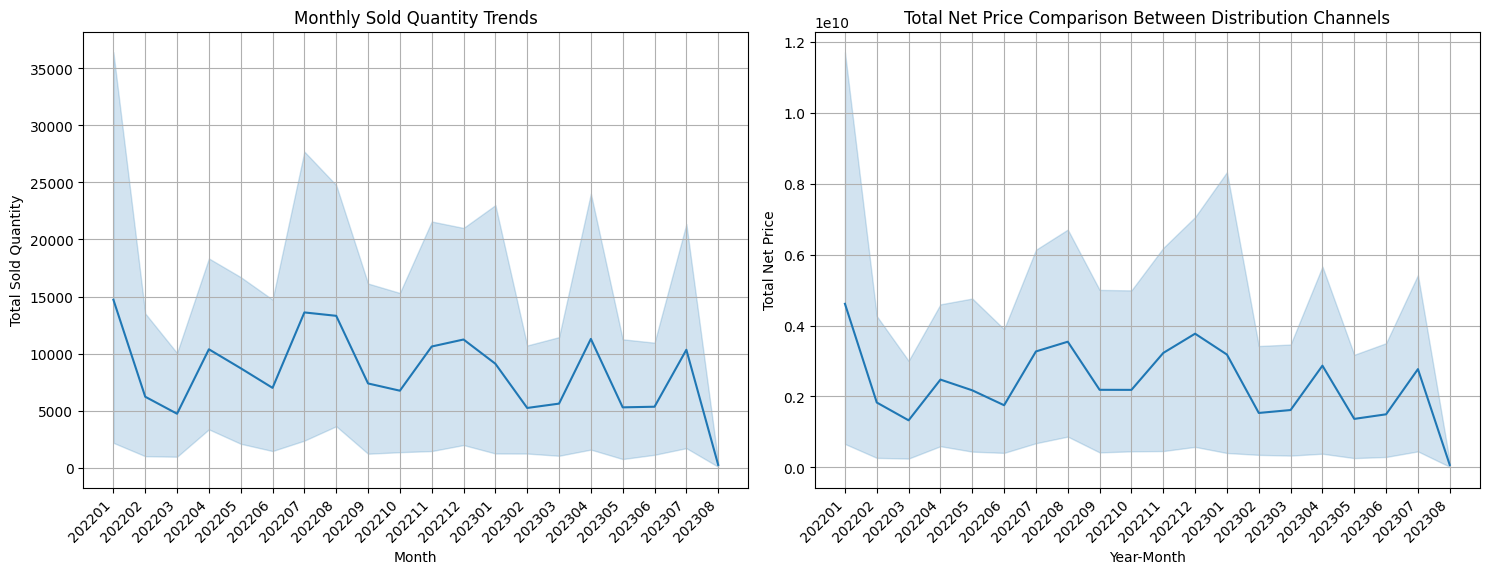

In [63]:
# Plotting the monthly sold quantity trend
plt.figure(figsize=(15, 6))

# Subplot 1: Monthly sold quantity trend
plt.subplot(1, 2, 1)
sns.lineplot(x='YearMonth', y='sold_quantity', data=monthly_sales)
plt.title('Monthly Sold Quantity Trends')
plt.xlabel('Month')
plt.ylabel('Total Sold Quantity')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Subplot 2: Total Net Price Comparison Between Distribution Channels
plt.subplot(1, 2, 2)

# Use seaborn lineplot to draw the line graph
sns.lineplot(x="YearMonth", y="net_price", data=sum_net_price)

# Set labels and title
plt.xlabel("Year-Month")
plt.ylabel("Total Net Price")
plt.title("Total Net Price Comparison Between Distribution Channels")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.grid(True)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Is there any colleration between sales and quantity?

In [64]:
merged_data_price_quantity = pd.merge(monthly_sales, sum_net_price, on='YearMonth')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\2247812653.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='sold_quantity', y='net_price', data=merged_data_price_quantity, palette='viridis', s=100)


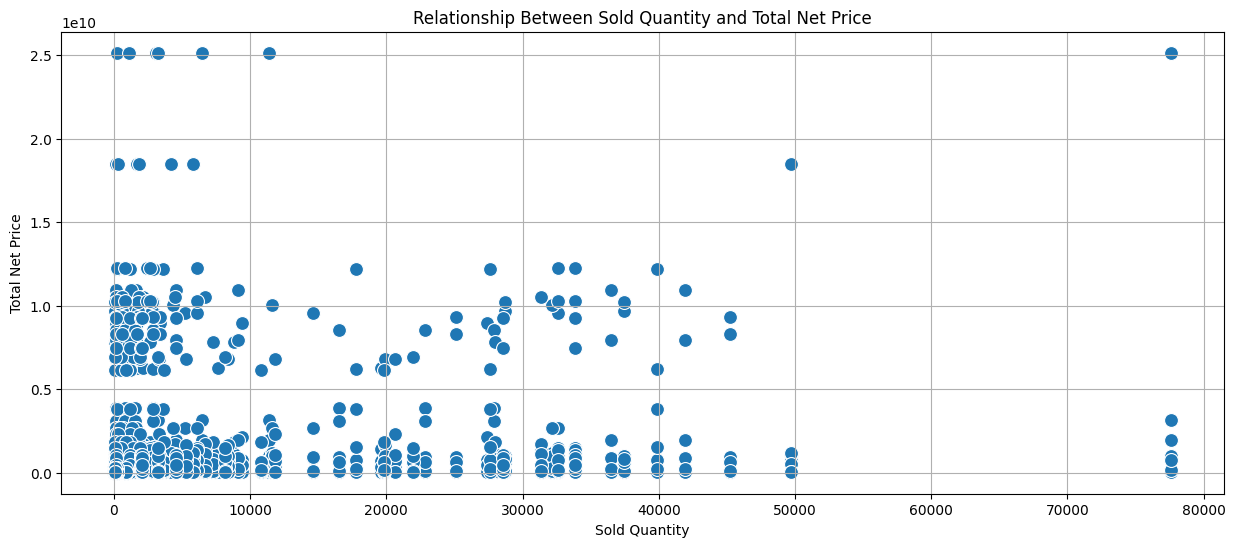

In [65]:
plt.figure(figsize=(15, 6))

sns.scatterplot(x='sold_quantity', y='net_price', data=merged_data_price_quantity, palette='viridis', s=100)
plt.title('Relationship Between Sold Quantity and Total Net Price')
plt.xlabel('Sold Quantity')
plt.ylabel('Total Net Price')
plt.grid(True)

plt.show()

In [66]:
correlation = merged_data_price_quantity['sold_quantity'].corr(merged_data_price_quantity['net_price'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.06275266160946821


In the context of sold quantity and net price, a correlation coefficient of 0.06275 suggests that there is a slightly positive but very weak relationship between them. It implies that while there might be a tendency for the net price to increase as the sold quantity increases, the relationship is not strong, and other factors likely have a more significant impact on net price.

#### How does the distribution channel impact sales?

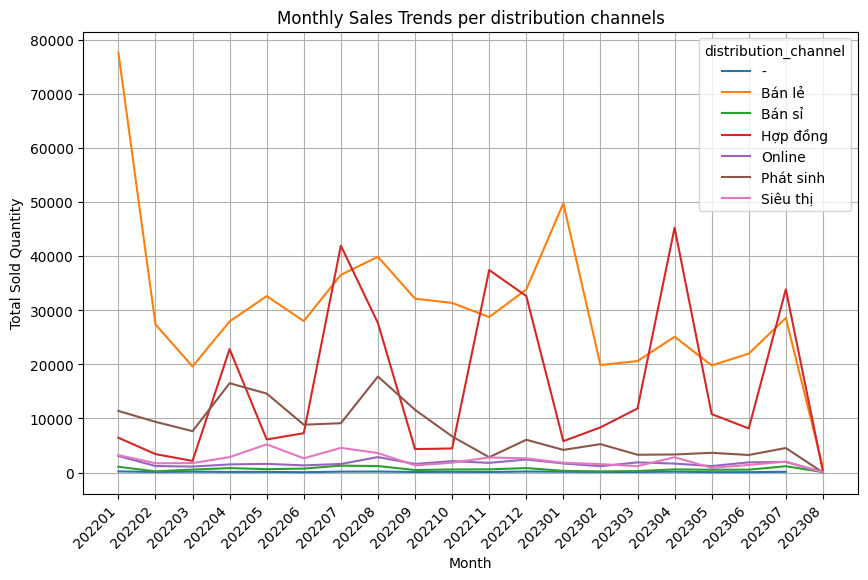

In [67]:
# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='sold_quantity', hue="distribution_channel", data=monthly_sales)
plt.title('Monthly Sales Trends per distribution channels')
plt.xlabel('Month')
plt.ylabel('Total Sold Quantity')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


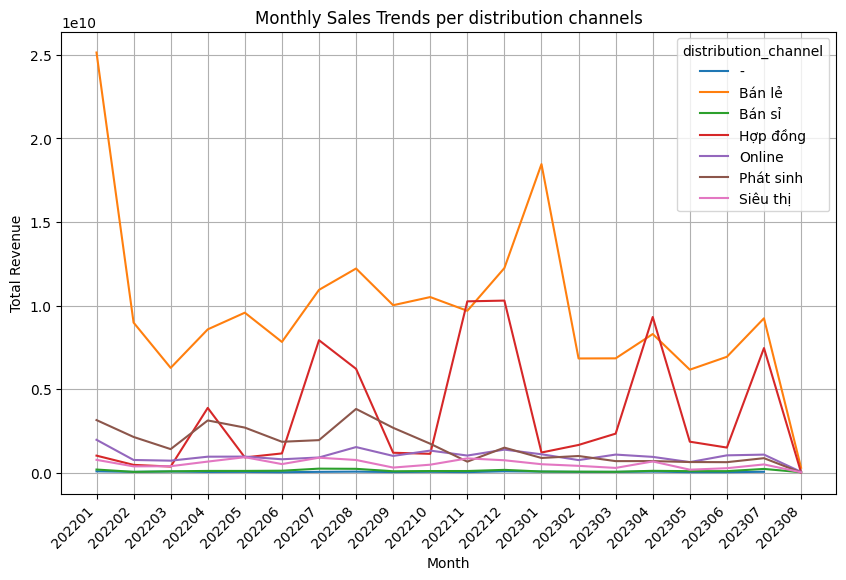

In [68]:
# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearMonth', y='net_price', hue="distribution_channel", data=sum_net_price)
plt.title('Monthly Sales Trends per distribution channels')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [69]:
monthly_sales

,YearMonth,distribution_channel,sold_quantity
0,202201,-,224
1,202201,Bán lẻ,77604
2,202201,Bán sỉ,1077
3,202201,Hợp đồng,6438
4,202201,Online,3068
...,...,...,...
133,202308,Bán lẻ,903
134,202308,Bán sỉ,99
135,202308,Hợp đồng,196
136,202308,Online,94


### 3. Price Analysis

#### Are there specific time periods where one distribution channel outperforms the others in terms of total net price?

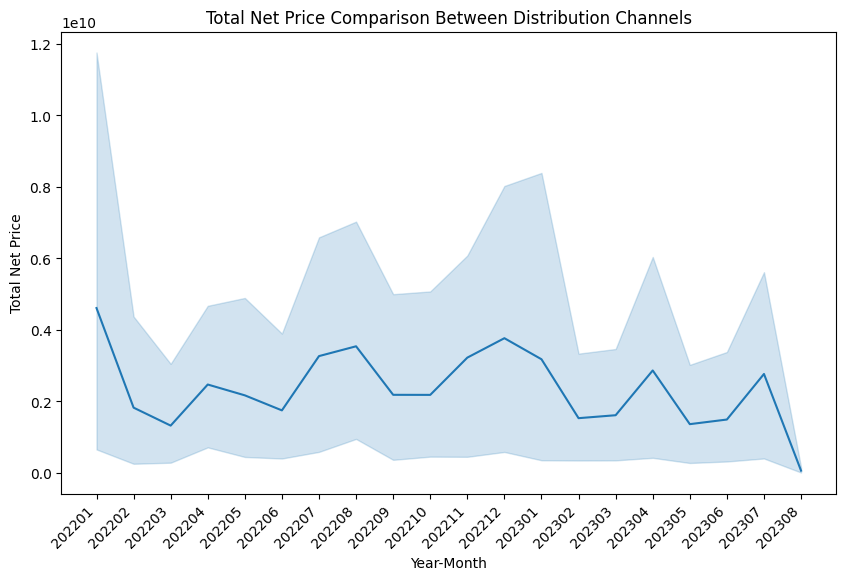

In [70]:
sum_net_price = filtered_data.groupby(['YearMonth', 'distribution_channel'])['net_price'].sum().reset_index()
sum_net_price = sum_net_price.sort_values('YearMonth')

# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
# Use seaborn lineplot to draw the line graph
sns.lineplot(x="YearMonth", y="net_price", data=sum_net_price)

# Set labels and title
plt.xlabel("Year-Month")
plt.ylabel("Total Net Price")
plt.title("Total Net Price Comparison Between Distribution Channels")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



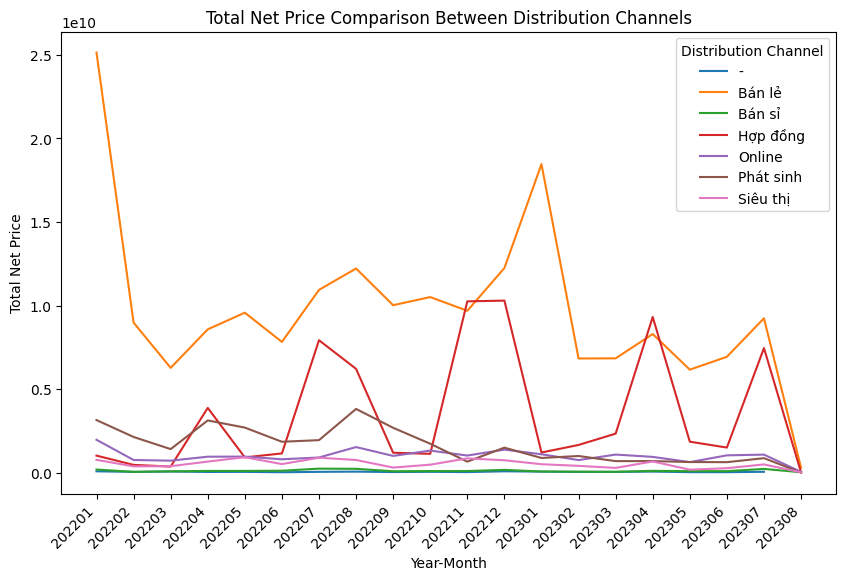

In [71]:
# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
# Use seaborn lineplot to draw the line graph
sns.lineplot(x="YearMonth", y="net_price", hue="distribution_channel", data=sum_net_price)

# Set labels and title
plt.xlabel("Year-Month")
plt.ylabel("Total Net Price")
plt.title("Total Net Price Comparison Between Distribution Channels")

# Show legend
plt.legend(title="Distribution Channel", loc="upper right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



In [72]:
# Group by 'YearMonth' and 'distribution_channel' and sum the 'net_price'
sum_net_price = filtered_data.groupby(['YearMonth', 'distribution_channel'])['net_price'].sum().reset_index()


In [73]:
sum_net_price.head()

,YearMonth,distribution_channel,net_price
0,202201,-,77824551
1,202201,Bán lẻ,25142027345
2,202201,Bán sỉ,184087956
3,202201,Hợp đồng,1016414073
4,202201,Online,1964576697


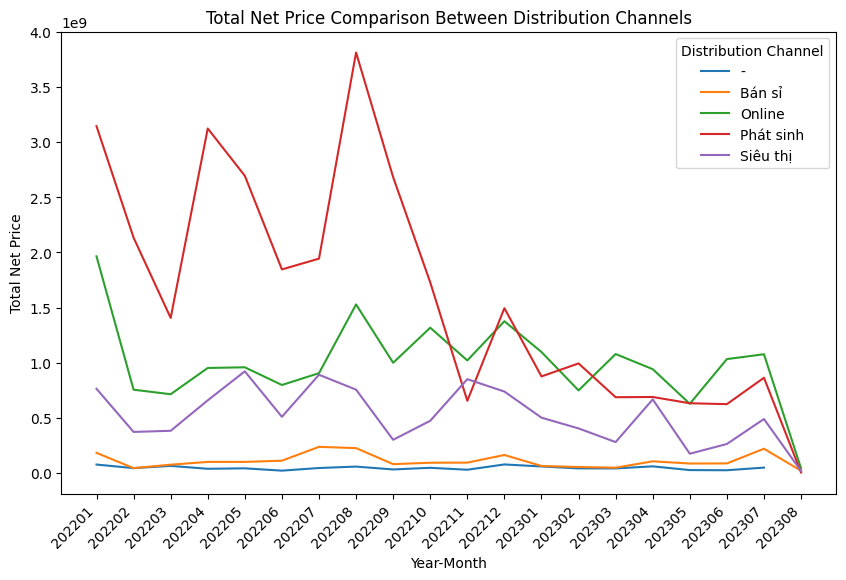

In [74]:
sieu_thi_data = sum_net_price[(sum_net_price['distribution_channel'] != 'Bán lẻ') & (sum_net_price['distribution_channel'] != 'Hợp đồng')]
sieu_thi_data = sieu_thi_data.sort_values("YearMonth")
# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
# Use seaborn lineplot to draw the line graph
sns.lineplot(x="YearMonth", y="net_price", hue="distribution_channel", data=sieu_thi_data)

# Set labels and title
plt.xlabel("Year-Month")
plt.ylabel("Total Net Price")
plt.title("Total Net Price Comparison Between Distribution Channels")

# Show legend
plt.legend(title="Distribution Channel", loc="upper right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


#### How does the sold quantity and revenue vary across gender and different price groups? Are there specific gender-price group combinations that contribute significantly to both sold quantity and net revenue, and are there any notable patterns or trends in the data?

In [75]:
# Merging df_product_master with merged_sales
final_product_merged_df = pd.merge(merged_sales, df_product_master, on='product_id', how='left')


In [76]:
# Grouping by 'gender' and 'price_group' to evaluate sales performance
sales_performance = final_product_merged_df.groupby(['gender', 'price_group']).agg({
    'sold_quantity': 'sum',  # Total sold quantity
    'net_price': 'mean'  # Average net price
}).reset_index()


In [77]:
sales_performance.describe()

,sold_quantity,net_price
count,26.000000,2.600000e+01
mean,45173.423077,3.867480e+05
std,36033.606166,3.022737e+05
min,610.000000,6.528067e+04
25%,17418.000000,1.569668e+05
50%,36105.500000,3.559972e+05
75%,65969.500000,4.564676e+05
max,125428.000000,1.133524e+06


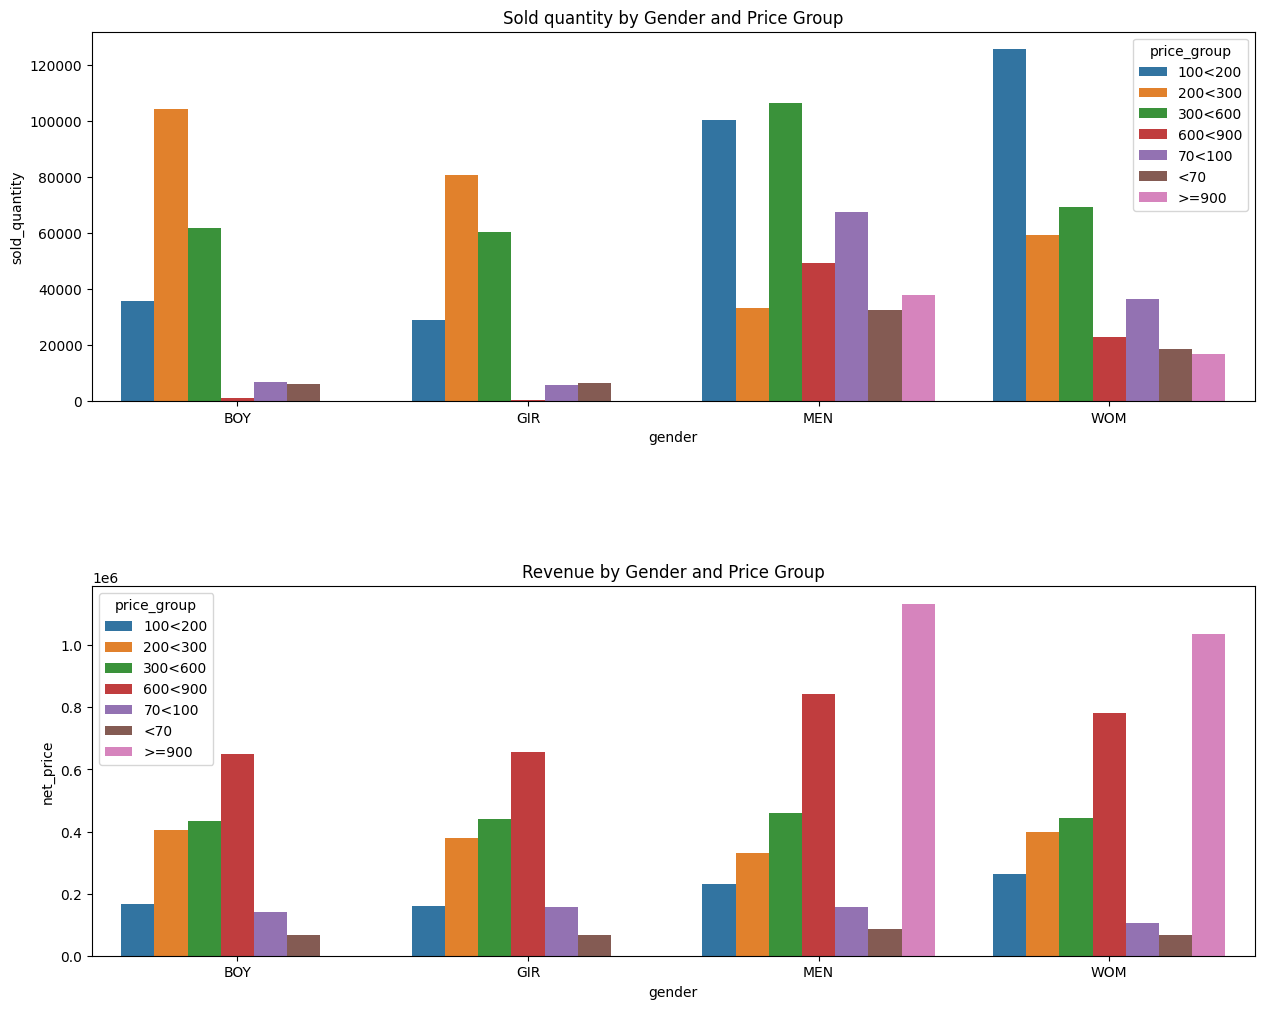

In [78]:
# Visualizing sales performance
# Plotting the monthly sold quantity trend
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed

plt.subplot(2, 1, 1)  # Changed the subplot to 2 rows, 1 column, and plot 1
sns.barplot(x='gender', y='sold_quantity', hue='price_group', data=sales_performance)
plt.title('Sold quantity by Gender and Price Group')

# Visualizing sales performance
plt.subplot(2, 1, 2)  # Changed the subplot to 2 rows, 1 column, and plot 2
sns.barplot(x='gender', y='net_price', hue='price_group', data=sales_performance)
plt.title('Revenue by Gender and Price Group')

plt.subplots_adjust(hspace=0.5)  # Add some spacing between subplots vertically
plt.show()


##### Boys (BOY):
- **0 to <3 years**: Low quantity sold but with a decent average net price, indicating fewer but possibly higher-priced items.
- **10 to <16 years**: Significant quantity sold with a high net price, suggesting this age group is a key market for boys' products.
- **3 to <6 years & 6 to <10 years**: Both segments show good sales volume, with 6 to <10 being particularly strong. This suggests a solid market presence in the middle childhood years.
- **Khác (Others)**: Lower sales, which could be miscellaneous or uncategorized items.

##### Girls (GIR):
- **0 to <3 years**: Similar to boys, lower sales volume but with a higher net price than the boys' equivalent age group.
- **10 to <16 years**: High sold quantity and net price, indicating strong market demand in this age group, even higher than the boys' equivalent.
- **3 to <6 years & 6 to <10 years**: Good sales volume, with the older age group (6 to <10) demonstrating particularly strong sales and net price.
- **Khác (Others)**: Lowest in quantity and net price, indicating a niche or miscellaneous category.

##### Men (MEN):
- **16 to <24 years & 24 to <40 years**: These are the prime segments with the highest sold quantities and substantial net prices, indicating a strong market presence among young and middle-aged men.
- **40 to <60 years**: Lower quantity but with a decent net price, suggesting fewer purchases but possibly of higher value items.
- **Trên 60 tuổi (Over 60)**: Very low quantity but with a very high net price, indicating niche, possibly luxury items targeted at older men.
- **Khác (Others)**: Moderate quantity and lower net price, likely miscellaneous items.

##### Women (WOM):
- 16 to <24 years & 24 to <40 years: High sales volume and net price, indicating these are key demographic segments for women, similar to men.
- 40 to <60 years: Lower quantity but a decent net price, similar to the trend in men, suggesting continued interest but possibly in higher-value items.
- Trên 60 tuổi (Over 60): Lower quantity but a relatively high net price, indicating a niche market for older women.
- Khác (Others): Similar to men, a moderate quantity with a lower net price.

##### General Observations & Strategic Considerations:
- **Key Demographics**: For both boys and girls, the 6 to <16 age range shows high activity, indicating a robust market. For adults, the 16 to <40 age range is crucial.
- **Premium Pricing in Older Age Groups**: Older demographics (40 years and above) tend to have a lower sold quantity but higher net prices, suggesting a market for premium or specialized products.
- **Gender-Specific Trends**: Girls' items in the 10 to <16 age group have higher net prices and quantities compared to boys, suggesting potential for targeted marketing and product development.
- **Potential for Expansion**: The 'Khác' category across all genders indicates miscellaneous or unclassified items. Understanding this category better could reveal new market opportunities or areas for data improvement.

#### When considering sold quantity and revenue, how does the performance vary across different product groups within each brand? Are there specific brand-product group combinations that stand out in terms of both sold quantity and net revenue, and are there any discernible patterns or trends in the sales data?

In [79]:
sales_performance_brand_group = final_product_merged_df.groupby(['brand_name', 'product_group']).agg({
    'sold_quantity': 'sum', 
    'net_price': 'mean' 
}).reset_index()


In [80]:
sales_performance_brand_group

,brand_name,product_group,sold_quantity,net_price
0,Brand1,DEP,488809,217767.962691
1,Brand1,GIA,116887,475599.150096
2,Brand1,PKI,33849,63722.456084
3,Brand1,SAN,363630,405914.446358
4,Brand1,TBL,1569,264969.524339
5,Brand2,GIA,120281,929801.810489
6,Brand2,PKI,9151,89100.253459
7,Brand2,SAN,37599,504307.006756
8,Brand2,TBL,192,640522.294444
9,Brand3,DEP,326,669824.414286


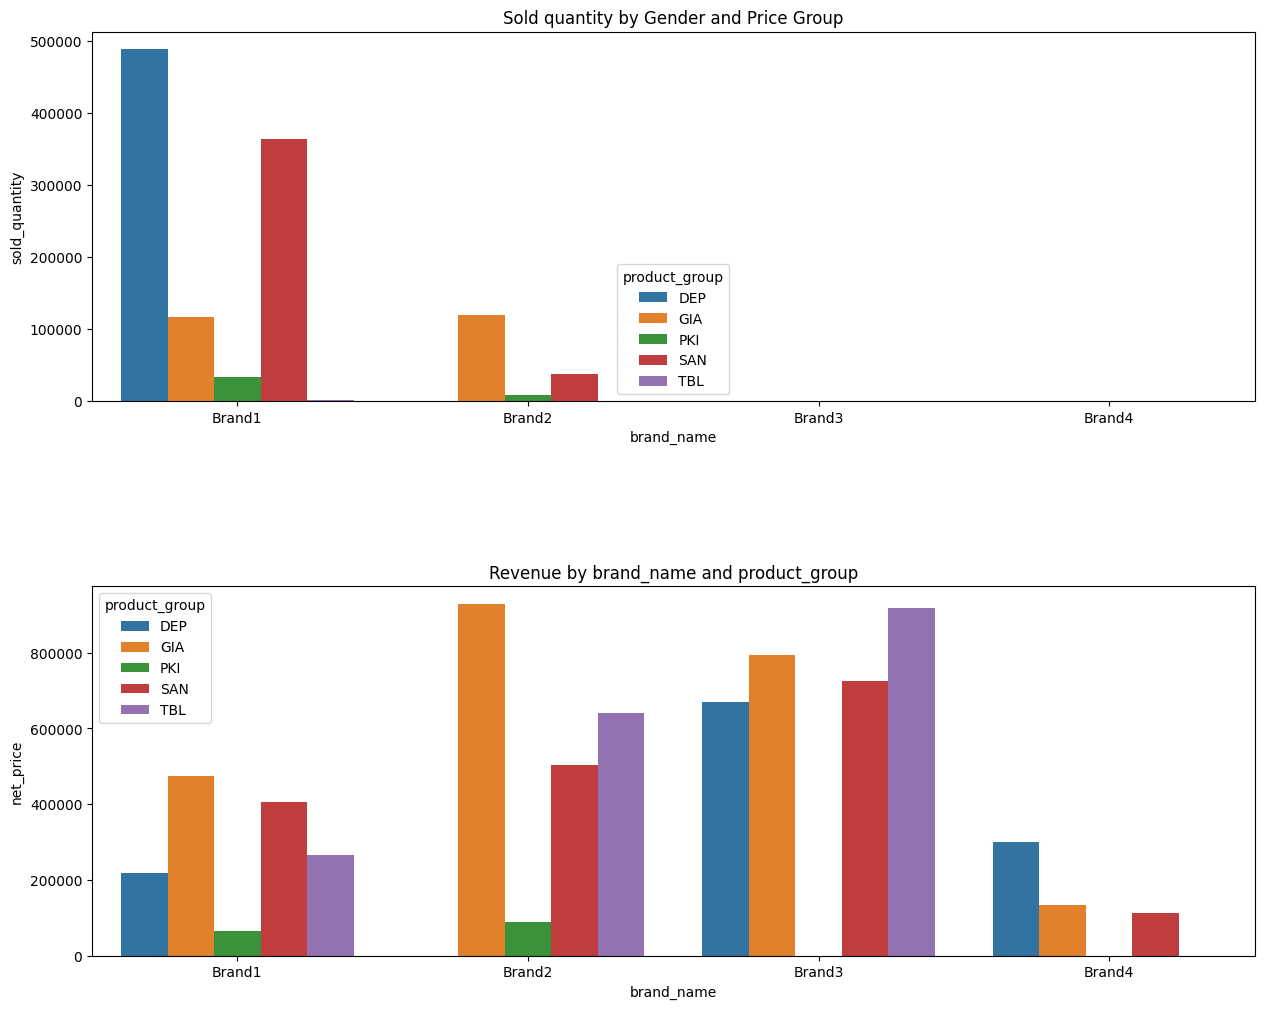

In [81]:
# Visualizing sales performance
# Plotting the monthly sold quantity trend
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed

plt.subplot(2, 1, 1)  # Changed the subplot to 2 rows, 1 column, and plot 1
sns.barplot(x='brand_name', y='sold_quantity', hue='product_group', data=sales_performance_brand_group)
plt.title('Sold quantity by Gender and Price Group')

# Visualizing sales performance
plt.subplot(2, 1, 2)  # Changed the subplot to 2 rows, 1 column, and plot 2
sns.barplot(x='brand_name', y='net_price', hue='product_group', data=sales_performance_brand_group)
plt.title('Revenue by brand_name and product_group')

plt.subplots_adjust(hspace=0.5)  # Add some spacing between subplots vertically
plt.show()


##### Brand1:
- **DEP**: High sold quantity with a relatively lower net price, indicating a popular, possibly more affordable or essential product group.
- **GIA**: Moderate sold quantity with a higher net price, suggesting a premium or less frequently purchased product group.
- **PKI**: Lower sold quantity and net price, indicating a niche or less popular product group within this brand.
- **SAN**: High sold quantity with a moderate net price, suggesting a popular and well-positioned product group.
- **TBL**: Very low sold quantity but a very high net price, indicating a premium, possibly luxury or specialized product group.

##### Brand2:
- **GIA**: High sold quantity with the highest net price among Brand2's products, indicating a successful, likely premium product group.
- **PKI**: Low sold quantity with a lower net price, suggesting a niche market or less popular product group.
- **SAN**: Moderate sold quantity and net price, indicating a reasonably popular product group.
- **TBL**: Extremely low quantity but with a very high net price, suggesting an exclusive or luxury product group.

##### Brand3:
- **DEP**: Very low sold quantity but the highest net price, indicating an extremely premium or specialized product group.
- **GIA, SAN, TBL**: Low quantities but very high net prices across all these groups, suggesting Brand3 specializes in premium, high-cost products.

##### Brand4:
- **DEP**: Low sold quantity with a moderate net price, indicating a niche or moderately positioned product group.
- **GIA**: Extremely low quantity and lower net price, suggesting this product group is not a strong performer.
- **SAN**: Very low quantity with a low net price, further indicating a less popular or niche product group.

##### General Observations & Strategic Considerations:
- **Brand Positioning**: 
  - **Brand1** shows a balanced portfolio with both high-volume, lower-priced products and lower-volume, higher-priced products.
  - **Brand2** and **Brand3** seem to be positioned in the premium market, especially Brand3, with consistently high net prices.
  - **Brand4** appears to have a more niche market with generally lower quantities sold.
- **Product Group Performance**: 
  - **DEP**: Varies significantly across brands, from high volume and lower prices in Brand1 to very high prices and low volume in Brand3.
  - **GIA**: Generally suggests a premium positioning, especially in Brand2 and Brand3.
  - **SAN**: Appears popular across brands but with a wide range in net prices.
  - **TBL**: Consistently shows as a premium or luxury product group with high net prices and generally low quantities.
- **Market Dynamics**: High net prices with low quantities suggest premium or luxury positioning, while higher quantities with lower prices suggest mass-market products. Brands and product groups need to be evaluated within the context of their market positioning and strategy.

#### How does the distribution channel impact sales?

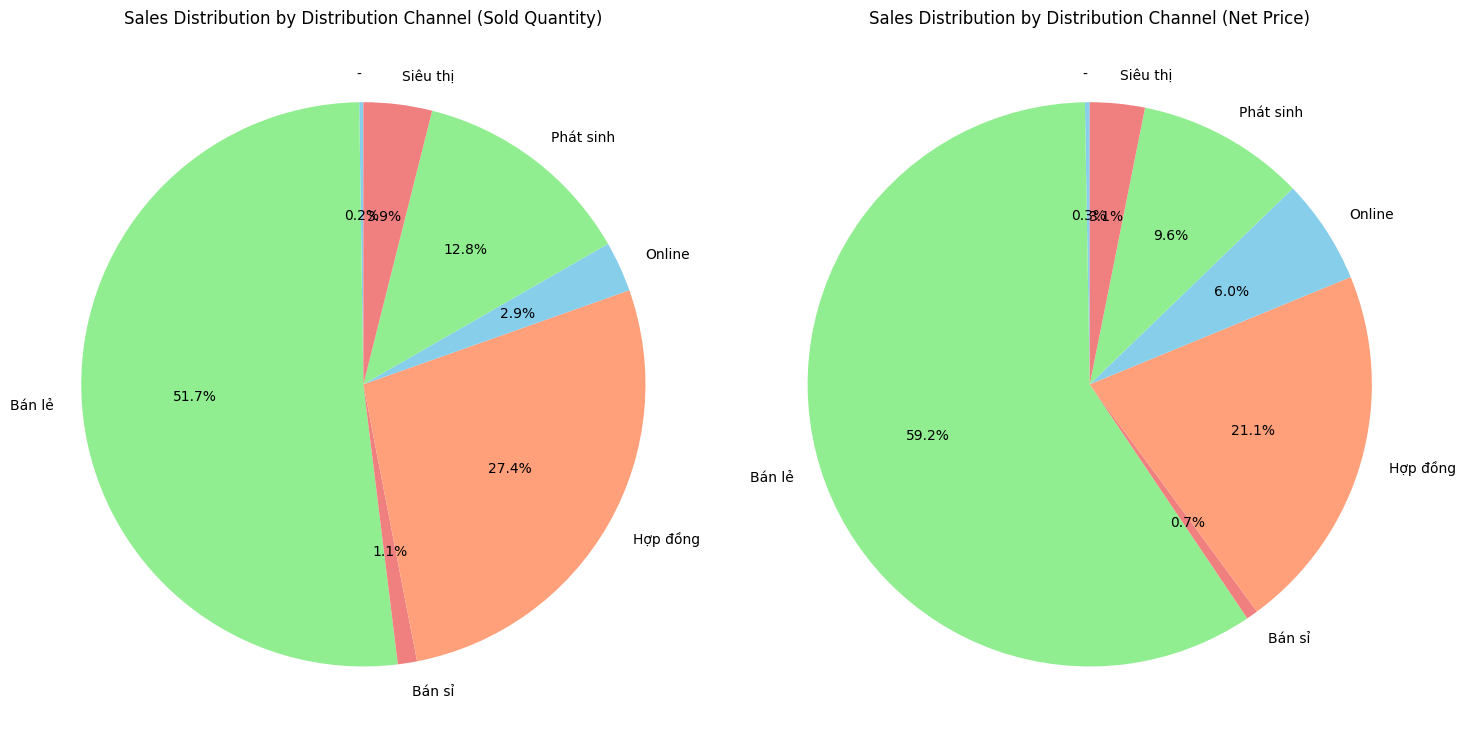

In [82]:
# Calculate total sold quantity and net price for each distribution channel
sold_quantity_channel_sales = merged_sales.groupby('distribution_channel')['sold_quantity'].sum().reset_index()
net_price_channel_sales = merged_sales.groupby('distribution_channel')['net_price'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(15, 8))

# Subplot 1: Sales Distribution by Distribution Channel - Sold Quantity
plt.subplot(1, 2, 1)
plt.pie(sold_quantity_channel_sales['sold_quantity'], labels=sold_quantity_channel_sales['distribution_channel'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Sales Distribution by Distribution Channel (Sold Quantity)')

# Subplot 2: Sales Distribution by Distribution Channel - Net Price
plt.subplot(1, 2, 2)
plt.pie(net_price_channel_sales['net_price'], labels=net_price_channel_sales['distribution_channel'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Sales Distribution by Distribution Channel (Net Price)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

- Retail: the dominant channel in terms of both quantity and revenue, indicating a strong retail market presence. The substantial revenue suggests a successful retail strategy with a broad customer base.
- Wholesale: A smaller quantity is sold, but considering the nature of wholesale (bulk selling), these figures could represent significant transactions.
- Contractual: A substantial quantity sold, likely to contractual partners or large orders. The high revenue indicates significant contracts or partnerships that contribute greatly to the overall sales.
- Online: The online channel shows a moderate sales volume but with a high revenue. This suggests a successful online strategy, possibly selling higher-priced items or having a strong market presence.
- Incidental: This could represent sporadic or occasional sales. The relatively high revenue and quantity suggest that while these sales are not the primary channel, they are significant.
- Supermarket: The supermarket channel has a decent sales volume and contributes a significant amount to the revenue. This indicates a strong presence in supermarkets, which can be an important retail strategy.

*General Observations & Strategy Considerations:*
- Retail Dominance: Retail is the dominant channel, suggesting a focus on enhancing retail operations, customer experience, and marketing.
- Online Potential: The online channel, while not the highest in volume, generates substantial revenue. This indicates a growing or strong market segment worth investing in further.
- Contractual Importance: The high revenue from contracts suggests valuable partnerships or large-scale deals that are crucial to the business.
- Diverse Portfolio: The presence of multiple effective channels indicates a diverse sales strategy, which can be beneficial for risk distribution and market coverage.

#### How does the sold quantity and revenue vary across different age groups within each gender category? Are there specific gender-age group combinations that demonstrate notable differences in both sold quantity and average net price, and do any trends or patterns emerge from this analysis?"

In [83]:
# Grouping by 'gender' and 'price_group' to evaluate sales performance
sales_performance_by_age = final_product_merged_df.groupby(['gender', 'age_group']).agg({
    'sold_quantity': 'sum',  # Total sold quantity
    'net_price': 'mean'  # Average net price
}).reset_index()


In [84]:
sales_performance_by_age

,gender,age_group,sold_quantity,net_price
0,BOY,0 đến <3 tuổi,1882,188278.173325
1,BOY,10 đến <16 tuổi,29819,533592.177798
2,BOY,3 đến <6 tuổi,22153,306192.523649
3,BOY,6 đến <10 tuổi,158437,335767.509850
4,BOY,Khác,3578,78289.261577
5,GIR,0 đến <3 tuổi,1184,159783.479626
6,GIR,10 đến <16 tuổi,25221,601032.139149
7,GIR,3 đến <6 tuổi,17490,264998.925593
8,GIR,6 đến <10 tuổi,136367,324535.119761
9,GIR,Khác,2565,65150.647946


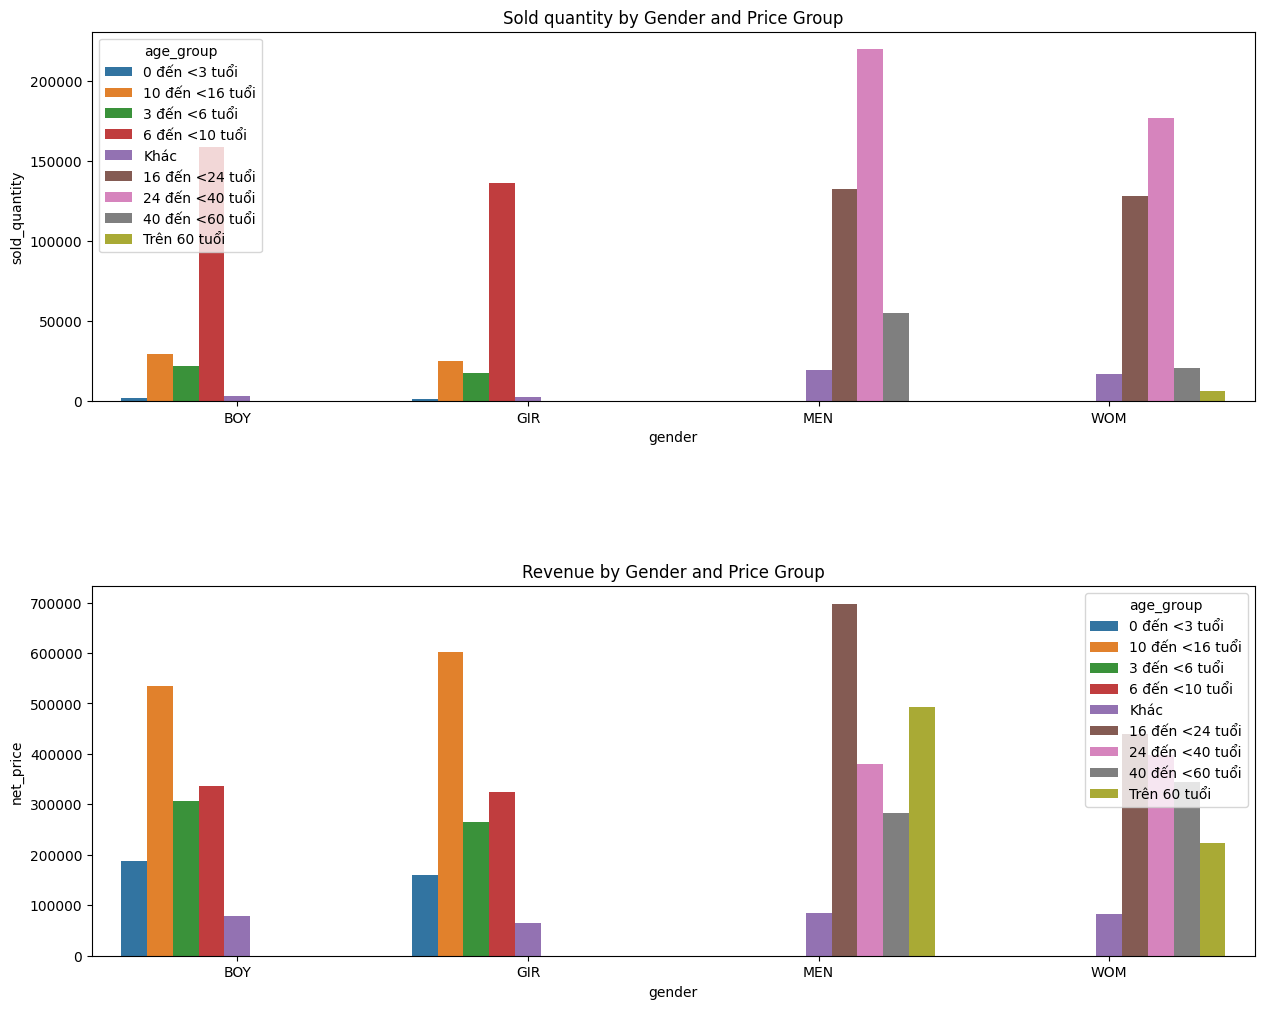

In [85]:
# Visualizing sales performance
# Plotting the monthly sold quantity trend
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed

plt.subplot(2, 1, 1)  # Changed the subplot to 2 rows, 1 column, and plot 1
sns.barplot(x='gender', y='sold_quantity', hue='age_group', data=sales_performance_by_age)
plt.title('Sold quantity by Gender and Price Group')

# Visualizing sales performance
plt.subplot(2, 1, 2)  # Changed the subplot to 2 rows, 1 column, and plot 2
sns.barplot(x='gender', y='net_price', hue='age_group', data=sales_performance_by_age)
plt.title('Revenue by Gender and Price Group')

plt.subplots_adjust(hspace=0.5)  # Add some spacing between subplots vertically
plt.show()


##### Boys (BOY):
- **0 to <3 years**: Low quantity sold but with a decent average net price, indicating fewer but possibly higher-priced items.
- **10 to <16 years**: Significant quantity sold with a high net price, suggesting this age group is a key market for boys' products.
- **3 to <6 years & 6 to <10 years**: Both segments show good sales volume, with 6 to <10 being particularly strong. This suggests a solid market presence in the middle childhood years.
- **Khác (Others)**: Lower sales, which could be miscellaneous or uncategorized items.

##### Girls (GIR):
- **0 to <3 years**: Similar to boys, lower sales volume but with a higher net price than the boys' equivalent age group.
- **10 to <16 years**: High sold quantity and net price, indicating strong market demand in this age group, even higher than the boys' equivalent.
- **3 to <6 years & 6 to <10 years**: Good sales volume, with the older age group (6 to <10) demonstrating particularly strong sales and net price.
- **Khác (Others)**: Lowest in quantity and net price, indicating a niche or miscellaneous category.

##### Men (MEN):
- **16 to <24 years & 24 to <40 years**: These are the prime segments with the highest sold quantities and substantial net prices, indicating a strong market presence among young and middle-aged men.
- **40 to <60 years**: Lower quantity but with a decent net price, suggesting fewer purchases but possibly of higher value items.
- **Trên 60 tuổi (Over 60)**: Very low quantity but with a very high net price, indicating niche, possibly luxury items targeted at older men.
- **Khác (Others)**: Moderate quantity and lower net price, likely miscellaneous items.

##### Women (WOM):
- **16 to <24 years & 24 to <40 years**: High sales volume and net price, indicating these are key demographic segments for women, similar to men.
- **40 to <60 years**: Lower quantity but a decent net price, similar to the trend in men, suggesting continued interest but possibly in higher-value items.
- **Trên 60 tuổi (Over 60)**: Lower quantity but a relatively high net price, indicating a niche market for older women.
- **Khác (Others)**: Similar to men, a moderate quantity with a lower net price.

##### General Observations & Strategic Considerations:
- **Key Demographics**: For both boys and girls, the 6 to <16 age range shows high activity, indicating a robust market. For adults, the 16 to <40 age range is crucial.
- **Premium Pricing in Older Age Groups**: Older demographics (40 years and above) tend to have a lower sold quantity but higher net prices, suggesting a market for premium or specialized products.
- **Gender-Specific Trends**: Girls' items in the 10 to <16 age group have higher net prices and quantities compared to boys, suggesting potential for targeted marketing and product development.
- **Potential for Expansion**: The 'Khác' category across all genders indicates miscellaneous or unclassified items. Understanding this category better could reveal new market opportunities or areas for data improvement.


#### When examining sales performance based on gender and lifestyle group, how do the sold quantity and revenue vary across different lifestyle groups within each gender category? Are there specific gender-lifestyle group combinations that exhibit significant differences in both sold quantity and net revenue, and are there any notable trends or insights that can be derived from this analysis?"

In [86]:
# Grouping by 'gender' and 'price_group' to evaluate sales performance
sales_performance_by_gender_and_lifestyle = final_product_merged_df.groupby(['gender', 'lifestyle_group']).agg({
    'sold_quantity': 'sum',  # Total sold quantity
    'net_price': 'mean'  # Average net price
}).reset_index()


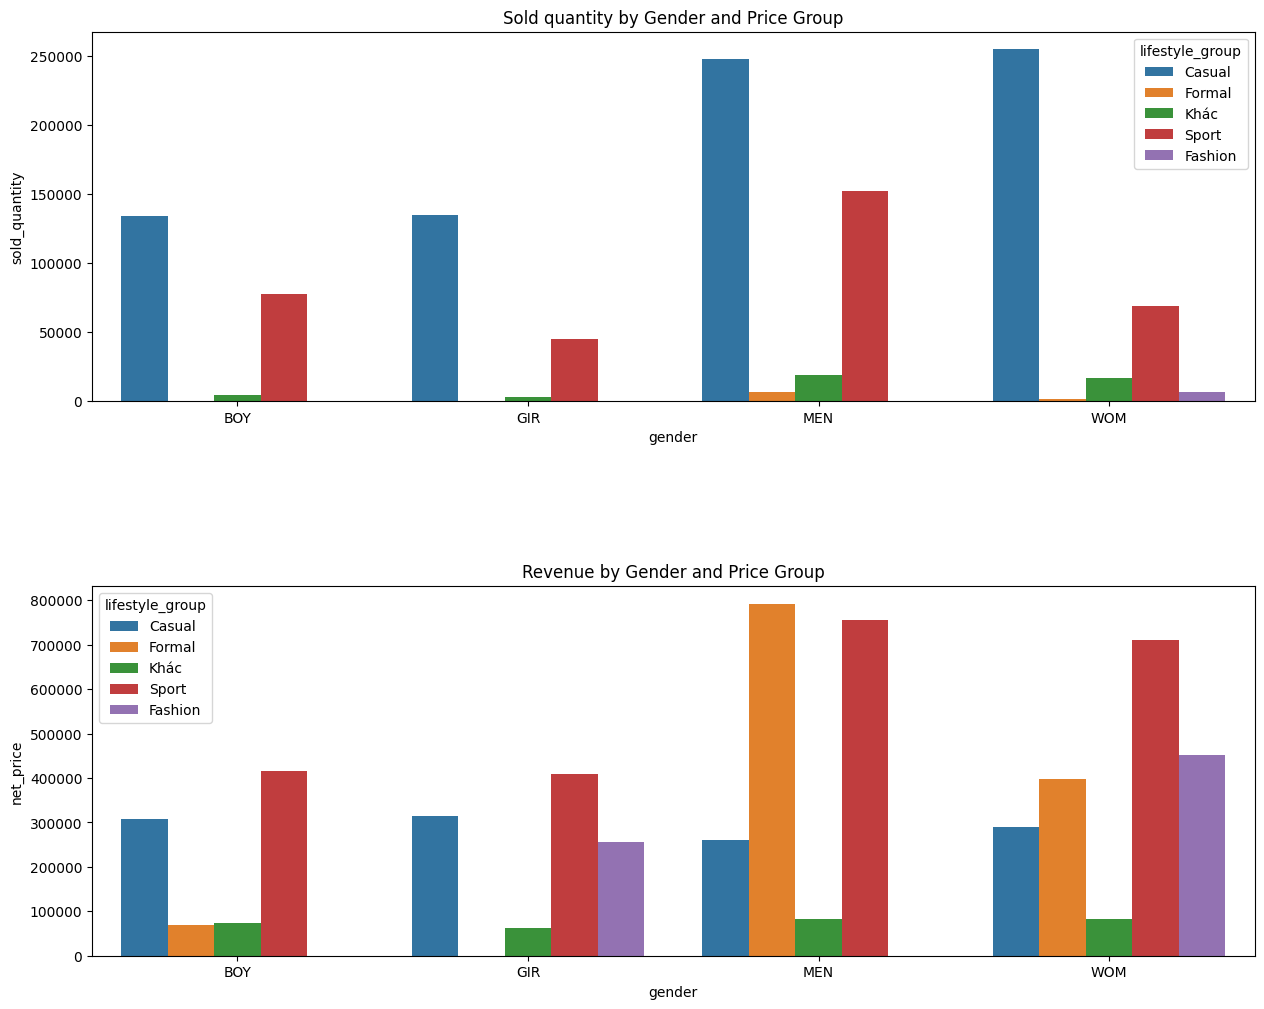

In [87]:
# Visualizing sales performance
# Plotting the monthly sold quantity trend
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed

plt.subplot(2, 1, 1)  # Changed the subplot to 2 rows, 1 column, and plot 1
sns.barplot(x='gender', y='sold_quantity', hue='lifestyle_group', data=sales_performance_by_gender_and_lifestyle)
plt.title('Sold quantity by Gender and Price Group')

# Visualizing sales performance
plt.subplot(2, 1, 2)  # Changed the subplot to 2 rows, 1 column, and plot 2
sns.barplot(x='gender', y='net_price', hue='lifestyle_group', data=sales_performance_by_gender_and_lifestyle)
plt.title('Revenue by Gender and Price Group')

plt.subplots_adjust(hspace=0.5)  # Add some spacing between subplots vertically
plt.show()


##### Boys (BOY):
- **Casual**: High sold quantity with a moderate net price, indicating a popular and potentially essential product group.
- **Formal**: Extremely low sold quantity but a higher net price, suggesting a niche or less frequently purchased category.
- **Khác (Others)**: Low sold quantity with a lower net price, indicating a less popular or miscellaneous category.
- **Sport**: Significant sold quantity with a high net price, suggesting a strong market presence and possibly premium offerings in sports attire.

##### Girls (GIR):
- **Casual**: Similar to boys, high sold quantity with a moderate net price, indicating popularity and a primary choice for everyday wear.
- **Fashion**: Very low sold quantity but with a very high net price, suggesting exclusive or luxury fashion items.
- **Khác (Others)**: Low quantity and net price, similar to boys, indicating less popular or miscellaneous items.
- **Sport**: Moderate sold quantity with a high net price, indicating a solid market for girls' sportswear, possibly with premium offerings.

##### Men (MEN):
- **Casual**: Very high sold quantity with the lowest net price among MEN's categories, indicating a strong market presence and possibly a focus on value.
- **Formal**: Moderate sold quantity with the highest net price, suggesting premium pricing and a strong market for men's formal wear.
- **Khác (Others)**: Moderate quantity with a lower net price, likely miscellaneous or less defined items.
- **Sport**: High sold quantity with a very high net price, indicating a strong market and potentially premium offerings in men's sportswear.

##### Women (WOM):
- **Casual**: Highest sold quantity among women's categories with a moderate net price, indicating a strong market presence and potentially a primary wardrobe choice.
- **Fashion**: Low sold quantity but with a very high net price, suggesting luxury or high-end fashion items.
- **Formal**: Low quantity with a high net price, indicating a niche market for premium women's formal wear.
- **Khác (Others)**: Moderate quantity with a lower net price, similar to other demographics, indicating less popular or miscellaneous items.
- **Sport**: Moderate sold quantity with the highest net price among WOM's categories, suggesting a strong market for premium women's sportswear.

##### General Observations & Strategic Considerations:
- **Casual Wear Dominance**: Across all genders, casual wear shows high sold quantities, indicating its essential role in everyday attire.
- **Premium Sportswear**: Both men and women show a strong market presence in sportswear with high net prices, indicating a demand for quality or branded sports attire.
- **Niche Formal and Fashion Markets**: Formal wear for men and fashion items for women, while lower in quantity, command higher prices, suggesting premium or luxury market segments.
- **Diversity in Offerings**: The presence of 'Khác' across all genders indicates a variety of products that don't fit into traditional categories, which could represent an opportunity for market expansion or improved categorization.


### 4. Customer demographic analysis

In [88]:
sales_frame.head()

,month,week,site,branch_id,channel_id,distribution_channel,distribution_channel_code,sold_quantity,cost_price,net_price,customer_id,product_id
0,2022001,202201,1800,1800,Online,Online,ZF2,1,495720,729000,9847d4248,d77fdd34a14845db97837e059b0aca00TRG42
1,2022001,202204,1116,1100,CHTT,Bán lẻ,FP,1,221000,325000,2384aef55,e485c0ab7b9b470cbddb80ea7367e734DEN40
2,2022001,202201,1134,1100,CHTT,Bán lẻ,FP,1,255000,375000,20c3e0442,ac88f78262ee4b589bc93b106b67af1dDEN42
3,2022001,202204,1612,1600,CHTT,Bán lẻ,FP,1,258400,380000,e8b42ff8f,920641c624934c4a8695347737f8f59dDEN35
4,2022001,202202,1511,1500,CHTT,Bán lẻ,FP,1,272000,400000,b8d51499a,6764565f4bb141138af7d9cbf0905d0dHOL33


In [89]:
df_dischanel.head()

,index,site_store,b2b_b2c,channel_id,region,city_level,store_concept,trade_term,area_range,store_type,...,address_3,showroom_area,warehouse_area,start_month,start_year,end_month,end_year,note,customer_id,customer_name
0,0,60000003,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,0,0,NaN,435043cf9,customer878
1,1,60000006,B2B,ST,KVMN,Cấp 2,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,ĐNI,NaN,NaN,8,2010,0,0,NaN,db3c83bfa,customer904
2,2,60000007,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,0,0,NaN,f9bd8e994,customer1213
3,3,60000008,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,0,0,NaN,c6fb2b695,customer1792
4,4,60000534,B2B,ST,KVMN,Cấp TW,Cửa hàng của các siêu thị,Mua đứt bán đoạn,NaN,Siêu thị,...,HCM,NaN,NaN,8,2010,0,0,NaN,68be208f8,customer463


In [90]:
sales_frame.shape

(831966, 12)

In [91]:
merged_sales_dis_chanel = pd.merge(sales_frame, df_dischanel, how='left', left_on='customer_id', right_on='customer_id')

In [92]:
merged_sales_dis_chanel.shape

(831966, 34)

In [93]:
merged_sales_dis_chanel.describe()

,month,site,branch_id,sold_quantity,cost_price,net_price,index,site_store
count,8.319660e+05,831966.000000,831966.000000,831966.000000,8.319660e+05,8.319660e+05,831965.000000,8.319650e+05
mean,2.022310e+06,1283.890859,1265.760139,1.411734,3.055058e+05,3.993313e+05,1205.013180,1.332672e+07
std,4.588165e+02,214.917423,220.033499,3.262691,6.034099e+05,6.886876e+05,853.797591,2.485020e+07
min,2.022001e+06,1100.000000,1100.000000,-47.000000,-2.184840e+07,-2.302845e+07,0.000000,1.100000e+03
25%,2.022005e+06,1118.000000,1100.000000,1.000000,1.190000e+05,1.594260e+05,719.000000,1.139000e+03
50%,2.022009e+06,1200.000000,1200.000000,1.000000,2.069680e+05,2.900000e+05,836.000000,1.256000e+03
75%,2.023001e+06,1503.000000,1500.000000,1.000000,3.271420e+05,4.590000e+05,989.000000,1.800000e+03
max,2.023007e+06,2001.000000,2000.000000,500.000000,6.082435e+07,7.424144e+07,3389.000000,6.000405e+07


In [94]:
merged_sales_dis_chanel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831966 entries, 0 to 831965
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   month                      831966 non-null  int64  
 1   week                       831966 non-null  object 
 2   site                       831966 non-null  int64  
 3   branch_id                  831966 non-null  int64  
 4   channel_id_x               831966 non-null  object 
 5   distribution_channel       831966 non-null  object 
 6   distribution_channel_code  831966 non-null  object 
 7   sold_quantity              831966 non-null  int64  
 8   cost_price                 831966 non-null  int64  
 9   net_price                  831966 non-null  int64  
 10  customer_id                831965 non-null  object 
 11  product_id                 831966 non-null  object 
 12  index                      831965 non-null  float64
 13  site_store                 83

### What is the distribution of sales across different regions?

In [95]:
sales_by_region = merged_sales_dis_chanel.groupby('region')['net_price'].sum().reset_index()


In [96]:
sales_by_region

,region,net_price
0,KVCA,1468607912
1,KVMB,98085574359
2,KVMN,133269901182
3,KVMT,31512637064
4,KVMTR,14363928647
5,KVTN,25875673958
6,Khác,20169398914
7,Trung Quốc,7484150298


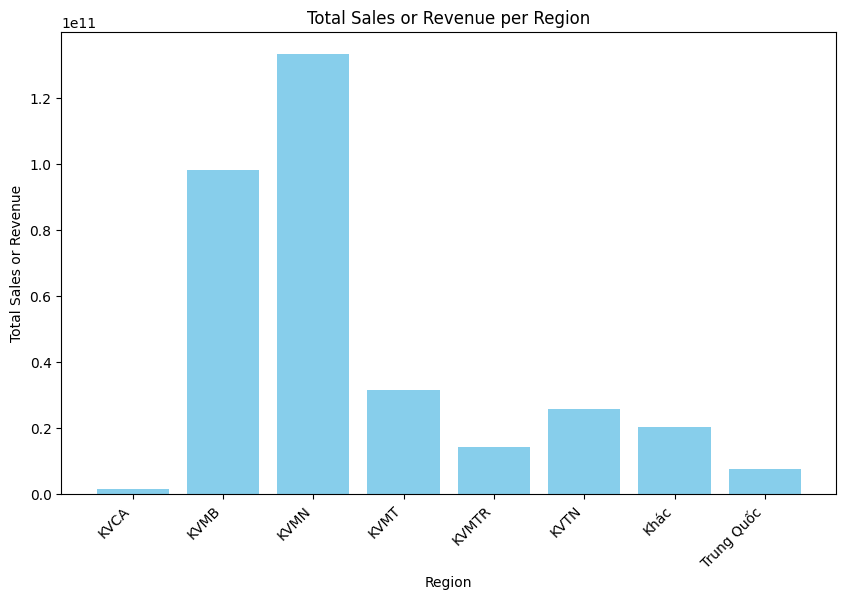

In [97]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_region['region'], sales_by_region['net_price'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales or Revenue')
plt.title('Total Sales or Revenue per Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### How does urbanization affect store performance?

In [98]:
urbanization_levels = merged_sales_dis_chanel['urbanization'].unique()
print(urbanization_levels)

['Khác' 'Nội thành' 'TT hành chính kinh tế' 'Nông thôn' nan]


In [99]:
urbanization_performance = merged_sales_dis_chanel.groupby('urbanization')['net_price'].mean().reset_index()


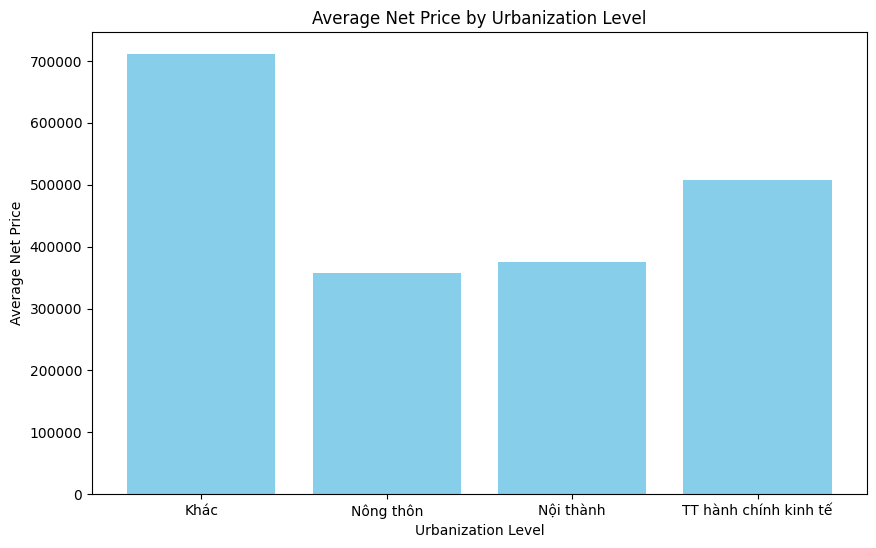

In [100]:
plt.figure(figsize=(10, 6))
plt.bar(urbanization_performance['urbanization'], urbanization_performance['net_price'], color='skyblue')
plt.xlabel('Urbanization Level')
plt.ylabel('Average Net Price')
plt.title('Average Net Price by Urbanization Level')
plt.show()

- The highest average net price is observed in the category of "TT hành chính kinh tế" (Administrative and Economic Centers).
- The "Khác" (Other) category also has a relatively high average net price.
- "Nội thành" (Urban) and "Nông thôn" (Rural) have lower average net prices compared to the other categories.

## Customer Segmentation for Retail channel only


In [101]:
merged_sales = pd.merge(sales_frame, master_calendar_df, how='left', left_on='week', right_on='YearWeek')
merged_sales = merged_sales[merged_sales['distribution_channel']=='Bán lẻ']
# Check the result
merged_sales.head()

,month,week,site,branch_id,channel_id,distribution_channel,distribution_channel_code,sold_quantity,cost_price,net_price,customer_id,product_id,Year,Month,Month_3Char,Week,YearWeek,Start Date,End Date,CNY
1,2022001,202204,1116,1100,CHTT,Bán lẻ,FP,1,221000,325000,2384aef55,e485c0ab7b9b470cbddb80ea7367e734DEN40,2022,1,Jan,4,202204,2022-01-30,2022-02-05,No
2,2022001,202201,1134,1100,CHTT,Bán lẻ,FP,1,255000,375000,20c3e0442,ac88f78262ee4b589bc93b106b67af1dDEN42,2022,1,Jan,1,202201,2022-01-09,2022-01-15,No
3,2022001,202204,1612,1600,CHTT,Bán lẻ,FP,1,258400,380000,e8b42ff8f,920641c624934c4a8695347737f8f59dDEN35,2022,1,Jan,4,202204,2022-01-30,2022-02-05,No
4,2022001,202202,1511,1500,CHTT,Bán lẻ,FP,1,272000,400000,b8d51499a,6764565f4bb141138af7d9cbf0905d0dHOL33,2022,1,Jan,2,202202,2022-01-16,2022-01-22,No
5,2022001,202204,1407,1400,CHTT,Bán lẻ,FP,1,244800,360000,c7908f4e8,ac1f5a5f5b9d4dab97fee275fa9c5537DEN39,2022,1,Jan,4,202204,2022-01-30,2022-02-05,No


In [102]:
# Filter data for the years 2022 and 2023
filtered_data = merged_sales[(merged_sales['Year'] == 2022) | (merged_sales['Year'] == 2023)]

# Combine 'Year' and 'Month' columns into a new 'YearMonth' column
filtered_data['YearMonth'] = filtered_data['Year'].astype(str) + filtered_data['Month'].astype(str).str.zfill(2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\2311194511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['YearMonth'] = filtered_data['Year'].astype(str) + filtered_data['Month'].astype(str).str.zfill(2)


In [103]:
filtered_data

,month,week,site,branch_id,channel_id,distribution_channel,distribution_channel_code,sold_quantity,cost_price,net_price,...,product_id,Year,Month,Month_3Char,Week,YearWeek,Start Date,End Date,CNY,YearMonth
1,2022001,202204,1116,1100,CHTT,Bán lẻ,FP,1,221000,325000,...,e485c0ab7b9b470cbddb80ea7367e734DEN40,2022,1,Jan,4,202204,2022-01-30,2022-02-05,No,202201
2,2022001,202201,1134,1100,CHTT,Bán lẻ,FP,1,255000,375000,...,ac88f78262ee4b589bc93b106b67af1dDEN42,2022,1,Jan,1,202201,2022-01-09,2022-01-15,No,202201
3,2022001,202204,1612,1600,CHTT,Bán lẻ,FP,1,258400,380000,...,920641c624934c4a8695347737f8f59dDEN35,2022,1,Jan,4,202204,2022-01-30,2022-02-05,No,202201
4,2022001,202202,1511,1500,CHTT,Bán lẻ,FP,1,272000,400000,...,6764565f4bb141138af7d9cbf0905d0dHOL33,2022,1,Jan,2,202202,2022-01-16,2022-01-22,No,202201
5,2022001,202204,1407,1400,CHTT,Bán lẻ,FP,1,244800,360000,...,ac1f5a5f5b9d4dab97fee275fa9c5537DEN39,2022,1,Jan,4,202204,2022-01-30,2022-02-05,No,202201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831957,2022012,202250,1241,1200,CHTT,Bán lẻ,FP,1,353180,519000,...,65b56f73fe204a7eb32619584e2e5abfDEN39,2022,12,Dec,50,202250,2022-12-18,2022-12-24,No,202212
831959,2022012,202249,1134,1100,CHTT,Bán lẻ,FP,1,343833,506000,...,6dca41011876464b875b7d23dd481065TIM35,2022,12,Dec,49,202249,2022-12-11,2022-12-17,No,202212
831960,2022012,202250,1106,1100,CHTT,Bán lẻ,FP,2,600872,884000,...,7a7b368ad2b8421ca95c2890dc8f82d2DEN43,2022,12,Dec,50,202250,2022-12-18,2022-12-24,No,202212
831963,2022012,202251,1214,1200,CHTT,Bán lẻ,FP,1,534109,785000,...,ef228e1c67564e4e90def4572446b047DEN43,2022,12,Dec,51,202251,2022-12-25,2022-12-31,No,202212


In [104]:
import pandas as pd

# Assuming merged_sales is your DataFrame
merged_sales['day'] = pd.to_datetime(merged_sales['Start Date']).dt.day

# Calculate Recency, Frequency, and Monetary for each customer
current_date = merged_sales['Start Date'].max()  # Get the longest date in the dataset
rfm_data = merged_sales.groupby('customer_id').agg({
    'Start Date': lambda x: (current_date - x.max()).days,  # Recency: days since last purchase
    'Week': 'nunique',                                        # Frequency: number of purchases
    'net_price': 'sum'                                      # Monetary Value: sum of net prices
}).reset_index()

# Rename columns
rfm_data.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Display the resulting RFM DataFrame
rfm_data.head()


,customer_id,recency,frequency,monetary
0,0196d459c,7,53,441659000
1,01d4e273a,504,12,55704255
2,02c2eb119,35,4,10344000
3,035bf6bb7,0,53,612172233
4,0467e2cbc,0,53,770756528


In [105]:
rfm_data.isna().count()

customer_id    221
recency        221
frequency      221
monetary       221
dtype: int64

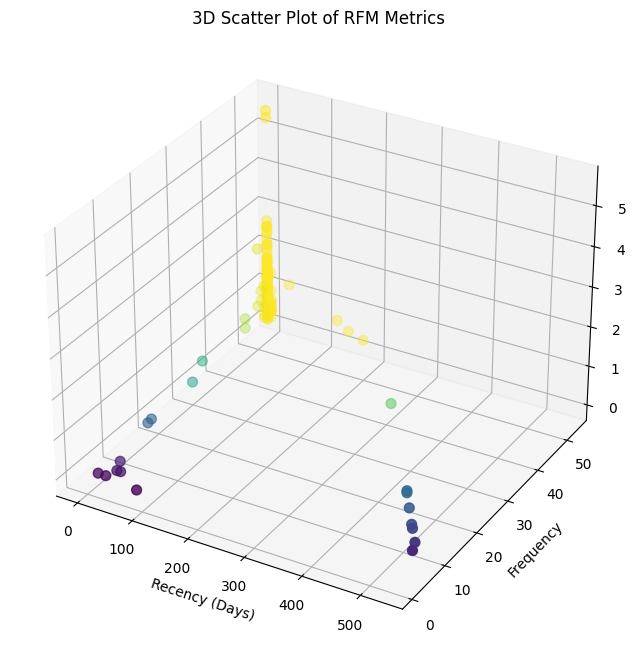

In [106]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Recency, Frequency, and Monetary
ax.scatter(rfm_data['recency'], rfm_data['frequency'], rfm_data['monetary'], c=rfm_data['frequency'], cmap='viridis', s=50)

# Set labels
ax.set_xlabel('Recency (Days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Set title
ax.set_title('3D Scatter Plot of RFM Metrics')

# Show the plot
plt.show()


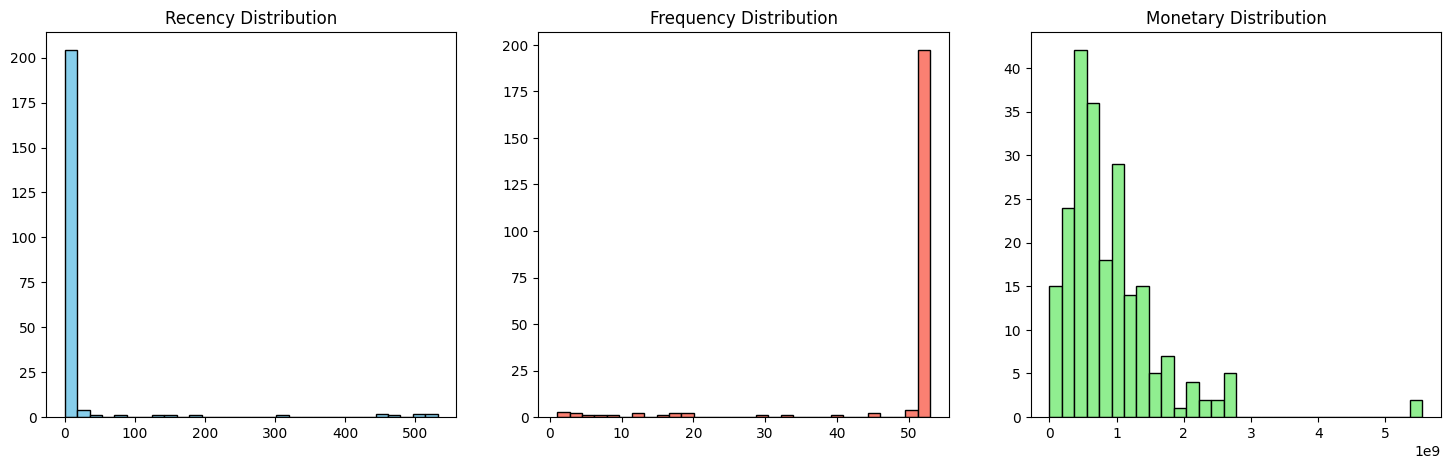

In [107]:

# Visualize the original distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].hist(rfm_data['recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Distribution')

axes[1].hist(rfm_data['frequency'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Frequency Distribution')

axes[2].hist(rfm_data['monetary'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Monetary Distribution')

plt.show()


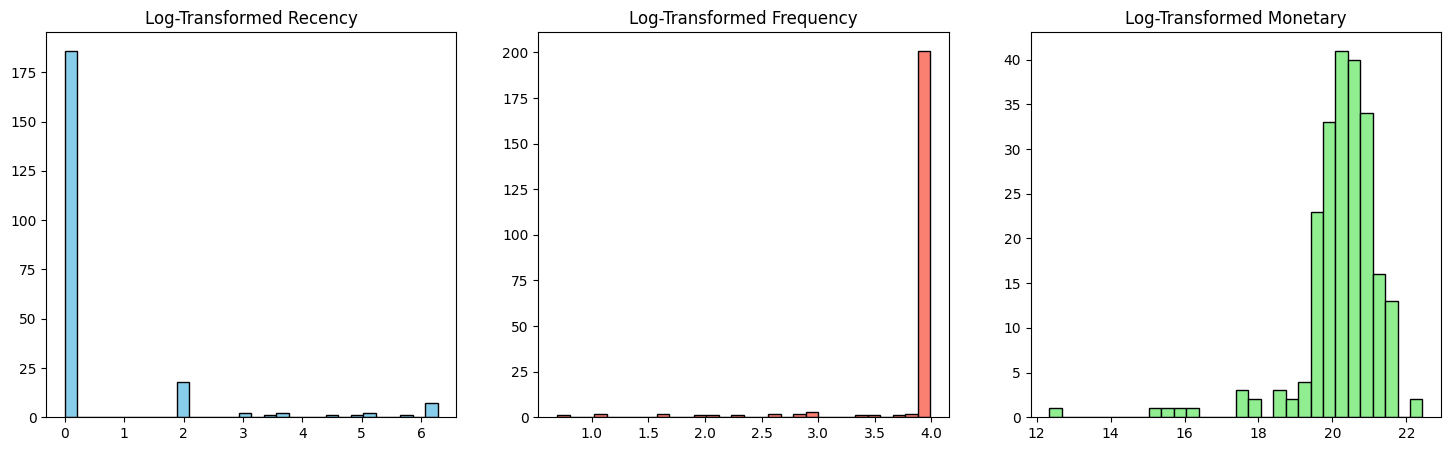

In [108]:
# Apply log transformation to recency, frequency, and monetary
rfm_data_transformed = rfm_data.copy()
rfm_data_transformed['recency'] = np.log1p(rfm_data['recency'])
rfm_data_transformed['frequency'] = np.log1p(rfm_data['frequency'])
rfm_data_transformed['monetary'] = np.log1p(rfm_data['monetary'])

# Visualize the transformed distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].hist(rfm_data_transformed['recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Log-Transformed Recency')

axes[1].hist(rfm_data_transformed['frequency'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Log-Transformed Frequency')

axes[2].hist(rfm_data_transformed['monetary'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Log-Transformed Monetary')

plt.show()


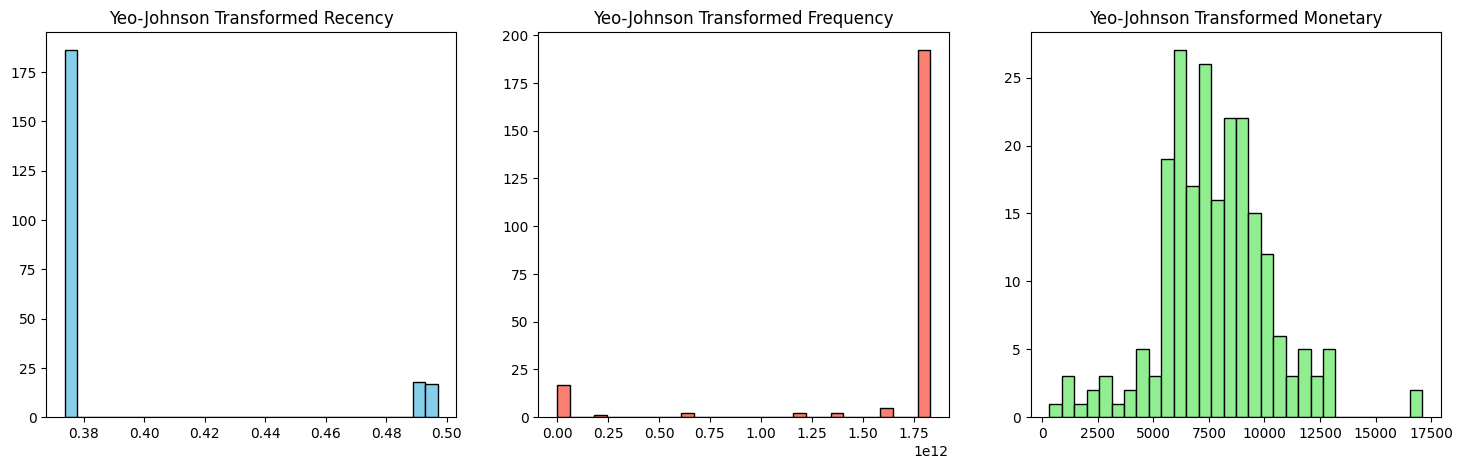

In [109]:
from scipy.stats import yeojohnson

# Apply Yeo-Johnson transformation to recency, frequency, and monetary
rfm_data_transformed_yeojohnson = rfm_data.copy()
rfm_data_transformed_yeojohnson['recency'], _ = yeojohnson(rfm_data['recency'] + 1)  # Adding 1 to handle zero values
rfm_data_transformed_yeojohnson['frequency'], _ = yeojohnson(rfm_data['frequency'] + 1)
rfm_data_transformed_yeojohnson['monetary'], _ = yeojohnson(rfm_data['monetary'] + 1)

# Visualize the Yeo-Johnson transformed distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].hist(rfm_data_transformed_yeojohnson['recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Yeo-Johnson Transformed Recency')

axes[1].hist(rfm_data_transformed_yeojohnson['frequency'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Yeo-Johnson Transformed Frequency')

axes[2].hist(rfm_data_transformed_yeojohnson['monetary'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Yeo-Johnson Transformed Monetary')

plt.show()


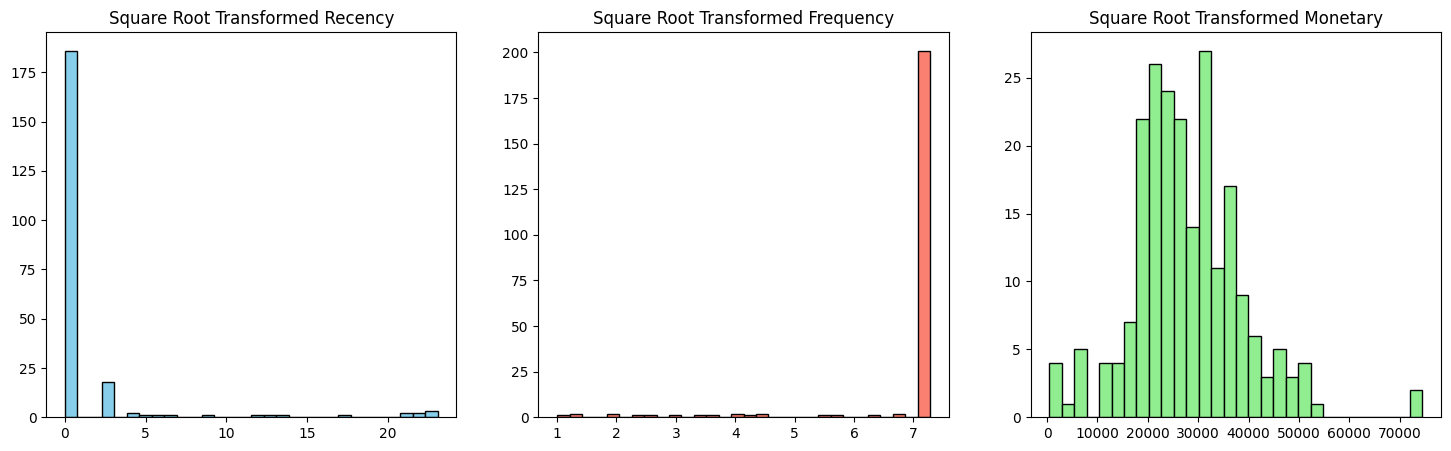

In [110]:
# Apply square root transformation to recency, frequency, and monetary
rfm_data_sqrt_transformed = rfm_data.copy()
rfm_data_sqrt_transformed['recency'] = np.sqrt(rfm_data['recency'])
rfm_data_sqrt_transformed['frequency'] = np.sqrt(rfm_data['frequency'])
rfm_data_sqrt_transformed['monetary'] = np.sqrt(rfm_data['monetary'])

# Visualize the square root transformed distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].hist(rfm_data_sqrt_transformed['recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Square Root Transformed Recency')

axes[1].hist(rfm_data_sqrt_transformed['frequency'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Square Root Transformed Frequency')

axes[2].hist(rfm_data_sqrt_transformed['monetary'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Square Root Transformed Monetary')

plt.show()


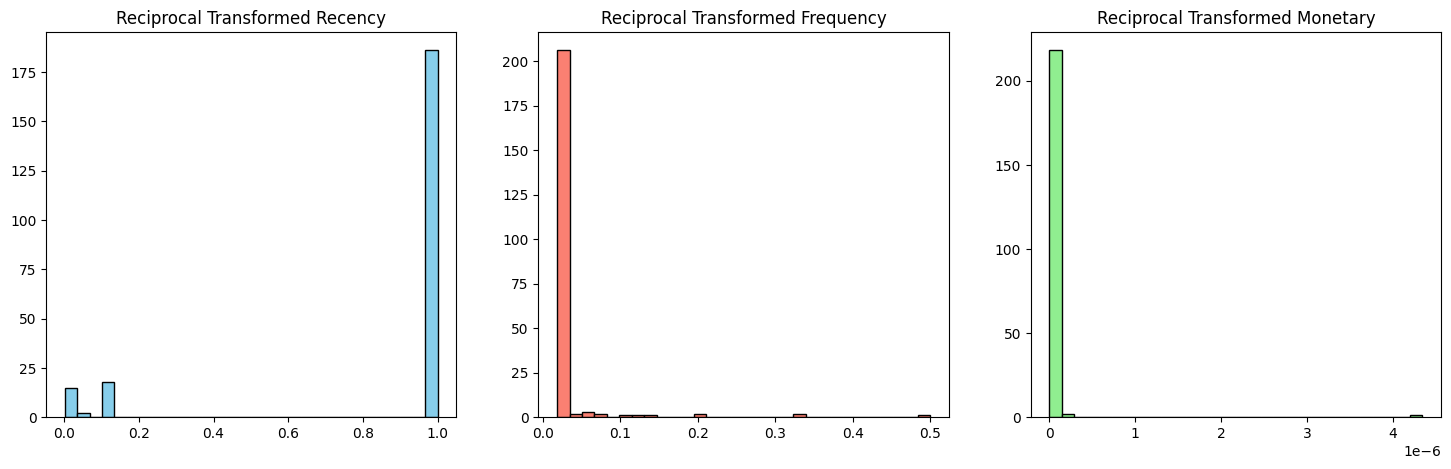

In [111]:
# Apply reciprocal transformation to recency, frequency, and monetary
rfm_data_reciprocal_transformed = rfm_data.copy()
rfm_data_reciprocal_transformed['recency'] = 1 / (rfm_data['recency'] + 1)  # Adding 1 to handle zero values
rfm_data_reciprocal_transformed['frequency'] = 1 / (rfm_data['frequency'] + 1)
rfm_data_reciprocal_transformed['monetary'] = 1 / (rfm_data['monetary'] + 1)

# Visualize the reciprocal transformed distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].hist(rfm_data_reciprocal_transformed['recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Reciprocal Transformed Recency')

axes[1].hist(rfm_data_reciprocal_transformed['frequency'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Reciprocal Transformed Frequency')

axes[2].hist(rfm_data_reciprocal_transformed['monetary'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Reciprocal Transformed Monetary')

plt.show()


In [112]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  221 non-null    object
 1   recency      221 non-null    int64 
 2   frequency    221 non-null    int64 
 3   monetary     221 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ KB


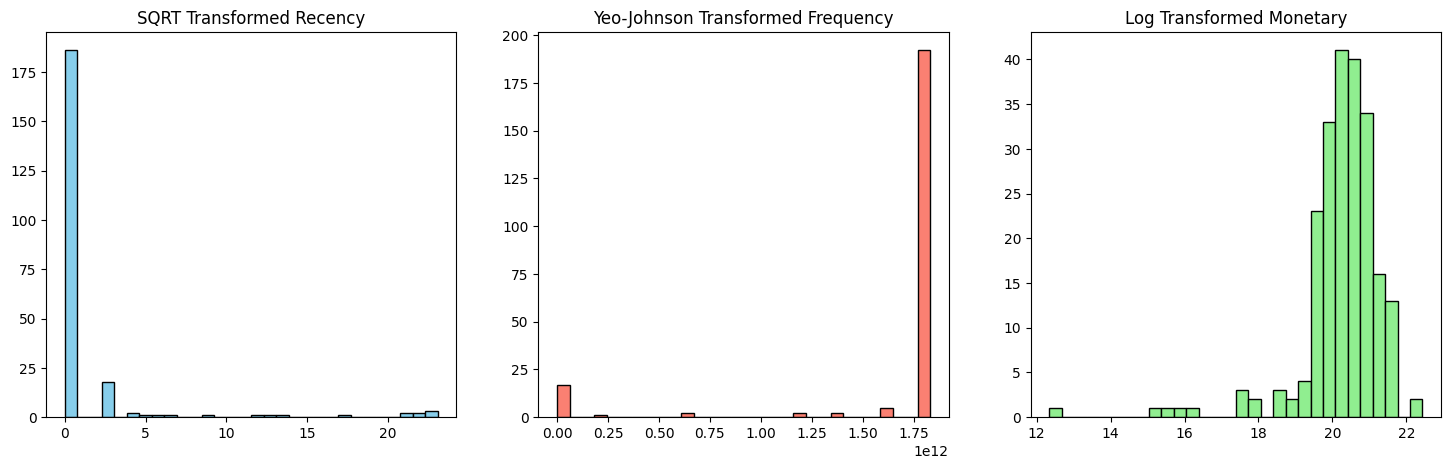

In [113]:
# Apply different transformations to recency, frequency, and monetary
rfm_data_mixed_transformed = rfm_data.copy()
rfm_data_mixed_transformed['recency'] = np.sqrt(rfm_data['recency'])  # Reciprocal transformation
rfm_data_mixed_transformed['frequency'], _ = yeojohnson(rfm_data['frequency'] + 1)  # Yeo-Johnson transformation
# Add a small constant to avoid zero values in the monetary column
rfm_data['monetary'] = rfm_data['monetary'] + 1e-10
rfm_data_mixed_transformed['monetary'] = np.log1p(rfm_data['monetary'])  # Log transformation

# Visualize the mixed transformed distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axes[0].hist(rfm_data_mixed_transformed['recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('SQRT Transformed Recency')

axes[1].hist(rfm_data_mixed_transformed['frequency'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Yeo-Johnson Transformed Frequency')

axes[2].hist(rfm_data_mixed_transformed['monetary'], bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Log Transformed Monetary')

plt.show()


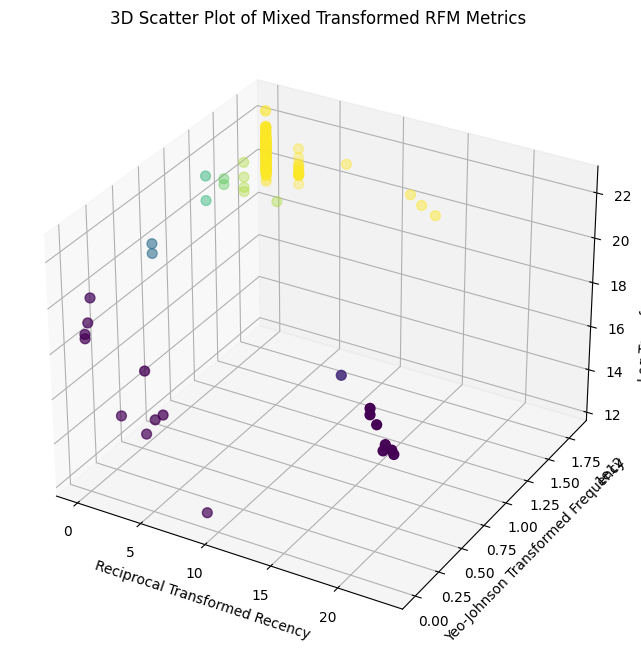

In [114]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Recency, Frequency, and Monetary
ax.scatter(
    rfm_data_mixed_transformed['recency'],
    rfm_data_mixed_transformed['frequency'],
    rfm_data_mixed_transformed['monetary'],
    c=rfm_data_mixed_transformed['frequency'],
    cmap='viridis',
    s=50
)

# Set labels
ax.set_xlabel('Reciprocal Transformed Recency')
ax.set_ylabel('Yeo-Johnson Transformed Frequency')
ax.set_zlabel('Log Transformed Monetary')

# Set title
ax.set_title('3D Scatter Plot of Mixed Transformed RFM Metrics')

# Show the plot
plt.show()


In [115]:
rfm_data_mixed_transformed

,customer_id,recency,frequency,monetary
0,0196d459c,2.645751,1.831020e+12,19.906049
1,01d4e273a,22.449944,5.969020e+07,17.835567
2,02c2eb119,5.916080,9.942156e+04,16.151917
3,035bf6bb7,0.000000,1.831020e+12,20.232524
4,0467e2cbc,0.000000,1.831020e+12,20.462883
...,...,...,...,...
216,f78ef3827,2.645751,1.831020e+12,20.195586
217,f92b1c069,0.000000,1.831020e+12,20.247538
218,fc0dc8117,2.645751,1.831020e+12,19.877382
219,fd15d3401,0.000000,1.831020e+12,20.742883


In [116]:
rfm_data_mixed_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  221 non-null    object 
 1   recency      221 non-null    float64
 2   frequency    221 non-null    float64
 3   monetary     221 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.0+ KB


In [117]:
from sklearn.preprocessing import StandardScaler


data_to_scale = rfm_data_mixed_transformed[['recency', 'frequency', 'monetary']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=['recency', 'frequency', 'monetary'])
scaled_rfm_data = pd.concat([rfm_data_mixed_transformed['customer_id'], scaled_df], axis=1)


In [118]:
from sklearn.cluster import KMeans

In [119]:
rfm_columns = scaled_rfm_data[['recency', 'frequency', 'monetary']]

In [120]:
rfm_columns

,recency,frequency,monetary
0,0.302382,0.342050,-0.300843
1,4.852091,-3.270048,-2.139166
2,1.053690,-3.270165,-3.634032
3,-0.305438,0.342050,-0.010974
4,-0.305438,0.342050,0.193555
...,...,...,...
216,0.302382,0.342050,-0.043771
217,-0.305438,0.342050,0.002356
218,0.302382,0.342050,-0.326295
219,-0.305438,0.342050,0.442160


In [121]:
rfm_columns.describe()

,recency,frequency,monetary
count,2.210000e+02,2.210000e+02,2.210000e+02
mean,-2.411344e-17,-9.474573e-16,1.585459e-15
std,1.002270e+00,1.002270e+00,1.002270e+00
min,-3.054383e-01,-3.270165e+00,-7.013344e+00
25%,-3.054383e-01,3.420499e-01,-3.262946e-01
50%,-3.054383e-01,3.420499e-01,1.128494e-01
75%,-3.054383e-01,3.420499e-01,5.332403e-01
max,4.993419e+00,3.420499e-01,1.946623e+00


In [122]:
rfm_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    221 non-null    float64
 1   frequency  221 non-null    float64
 2   monetary   221 non-null    float64
dtypes: float64(3)
memory usage: 5.3 KB


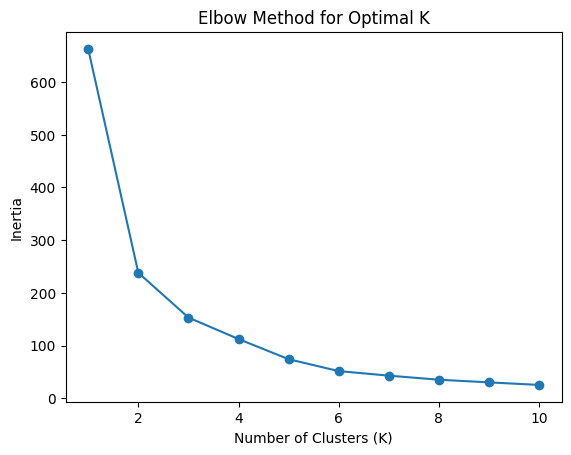

In [123]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_columns)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

4 segment

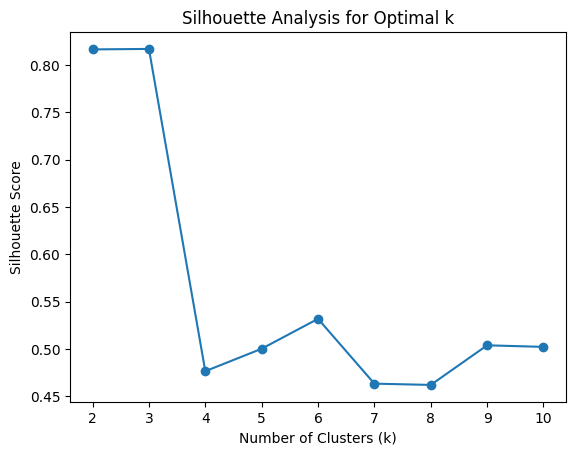

In [124]:
from sklearn.metrics import silhouette_score
# Assuming rfm_data is your DataFrame
X = rfm_columns[['recency', 'frequency', 'monetary']]

# Range of clusters to try
k_values = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

# Perform k-means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [125]:
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 3


-> 4 cluster

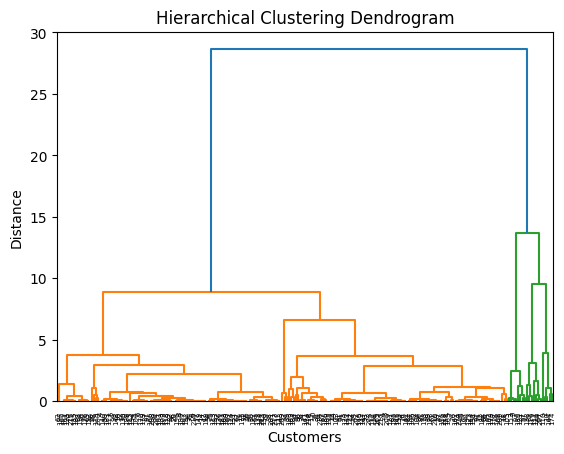

In [126]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming X is your feature matrix
X = rfm_columns[['recency', 'frequency', 'monetary']]

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


4 Segment 

In [127]:
scaled_rfm_data.set_index('customer_id', inplace=True)

In [128]:
numerical_features = scaled_rfm_data.copy()
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
scaled_rfm_data['cluster'] = kmeans.fit_predict(numerical_features)

average_values = scaled_rfm_data.groupby('cluster').mean()
print(average_values)

          recency  frequency  monetary
cluster                               
0       -0.135083   0.258997 -0.216513
1        4.655401  -3.210455 -1.742213
2        0.433931  -3.251920 -2.958902
3       -0.278120   0.315830  0.667112


In [129]:
rfm_data.set_index('customer_id', inplace=True)

In [130]:
merged_data = rfm_data.merge(scaled_rfm_data[['cluster']], left_index=True, right_index=True, how='left')
print(merged_data)

             recency  frequency      monetary  cluster
customer_id                                           
0196d459c          7         53  4.416590e+08        0
01d4e273a        504         12  5.570426e+07        1
02c2eb119         35          4  1.034400e+07        2
035bf6bb7          0         53  6.121722e+08        0
0467e2cbc          0         53  7.707565e+08        0
...              ...        ...           ...      ...
f78ef3827          7         53  5.899720e+08        0
f92b1c069          0         53  6.214325e+08        0
fc0dc8117          7         53  4.291780e+08        0
fd15d3401          0         53  1.019811e+09        3
fe306672e          0         53  4.205639e+08        0

[221 rows x 4 columns]


In [131]:
average_values = merged_data.groupby('cluster').mean()
print(average_values)

            recency  frequency      monetary
cluster                                     
0          5.519231  52.778846  5.071430e+08
1        469.000000  16.875000  1.076092e+08
2         19.600000  11.700000  1.038117e+08
3          0.565657  52.939394  1.433148e+09


- Cluster 0: Regular and recent customers with moderate frequency and high monetary value.
- Cluster 1: Infrequent but high-value customers who made a large purchase recently.
- Cluster 2: Moderate recency and frequency with a significant monetary value.
- Cluster 3: Very recent and frequent customers with the highest monetary value.


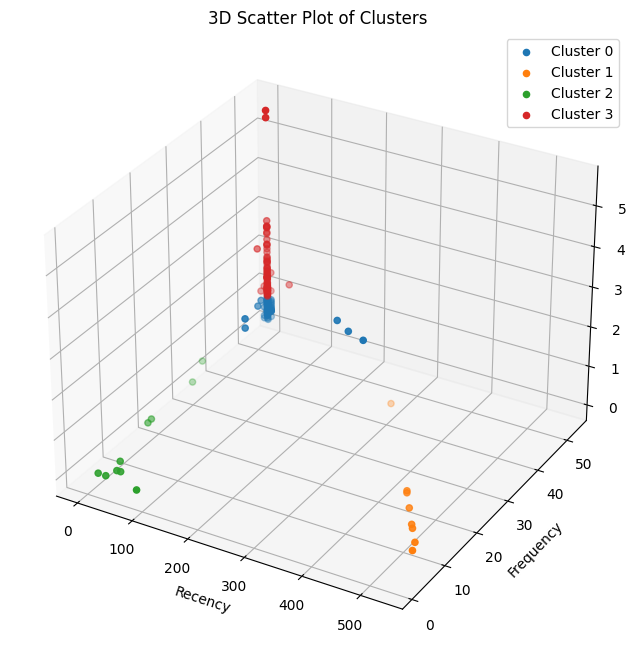

In [132]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in merged_data['cluster'].unique():
    cluster_data = merged_data[merged_data['cluster'] == cluster_label]
    ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary'], label=f'Cluster {int(cluster_label)}')

# Set labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of Clusters')

# Add legend
ax.legend()

# Show the plot
plt.show()

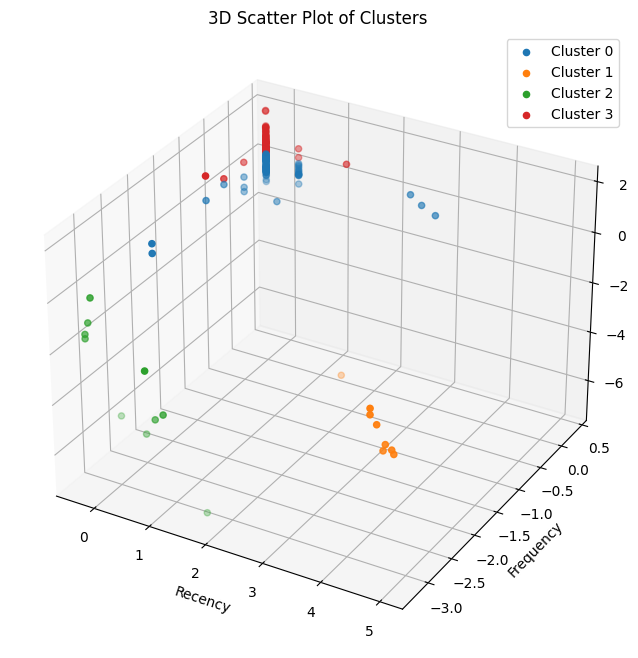

In [133]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_label in scaled_rfm_data['cluster'].unique():
    cluster_data = scaled_rfm_data[scaled_rfm_data['cluster'] == cluster_label]
    ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary'], label=f'Cluster {int(cluster_label)}')

# Set labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of Clusters')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [134]:
sales_frame['customer_id'] = sales_frame['customer_id'].astype(str)

result_df = pd.merge(merged_data, sales_frame, left_index=True, right_on='customer_id', how='inner')

result_df.head()

,recency,frequency,monetary,cluster,month,week,site,branch_id,channel_id,distribution_channel,distribution_channel_code,sold_quantity,cost_price,net_price,customer_id,product_id
65,7,53,441659000.0,0,2022001,202203,1615,1600,CHTT,Bán lẻ,FP,1,122400,180000,0196d459c,b8b8fe028da04009986195ae425b6e19XDG36
797,7,53,441659000.0,0,2022001,202204,1615,1600,CHTT,Bán lẻ,FP,1,665720,979000,0196d459c,a546b59248ac4de4b67262a3f12609ecDEN39
1433,7,53,441659000.0,0,2022001,202203,1615,1600,CHTT,Bán lẻ,FP,1,64600,95000,0196d459c,097ed51f70f9482ba1f1fe6f447eea62HOG31
2621,7,53,441659000.0,0,2022001,202203,1615,1600,CHTT,Bán lẻ,FP,1,81600,120000,0196d459c,181c2ef940c14099bc55110b367cae84HOG33
2642,7,53,441659000.0,0,2022001,202201,1615,1600,CHTT,Bán lẻ,FP,1,136000,200000,0196d459c,798e12cad3444ff689313c5c3da6a356XAD42


In [135]:
result_df['week'] = pd.to_datetime(result_df['week'].astype(str) + '1', format='%Y%W%w')

# Display the resulting dataframe
print(result_df)

        recency  frequency     monetary  cluster    month       week  site  \
65            7         53  441659000.0        0  2022001 2022-01-17  1615   
797           7         53  441659000.0        0  2022001 2022-01-24  1615   
1433          7         53  441659000.0        0  2022001 2022-01-17  1615   
2621          7         53  441659000.0        0  2022001 2022-01-17  1615   
2642          7         53  441659000.0        0  2022001 2022-01-03  1615   
...         ...        ...          ...      ...      ...        ...   ...   
829401        0         53  420563909.0        0  2022012 2022-12-26  1518   
830014        0         53  420563909.0        0  2022012 2022-12-12  1518   
830121        0         53  420563909.0        0  2022012 2022-12-05  1518   
830244        0         53  420563909.0        0  2022012 2022-12-19  1518   
831176        0         53  420563909.0        0  2022012 2022-12-12  1518   

        branch_id channel_id distribution_channel distribution_

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\3454533467.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='net_price', data=total_net_price, estimator=None, ci=None, label=f'Cluster {cluster_id}')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\3454533467.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='net_price', data=total_net_price, estimator=None, ci=None, label=f'Cluster {cluster_id}')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\3454533467.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='net_price', data=total_net_price, estimator=None, ci=None, label=f'Cluster {cluster_id}')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\3454533467.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.line

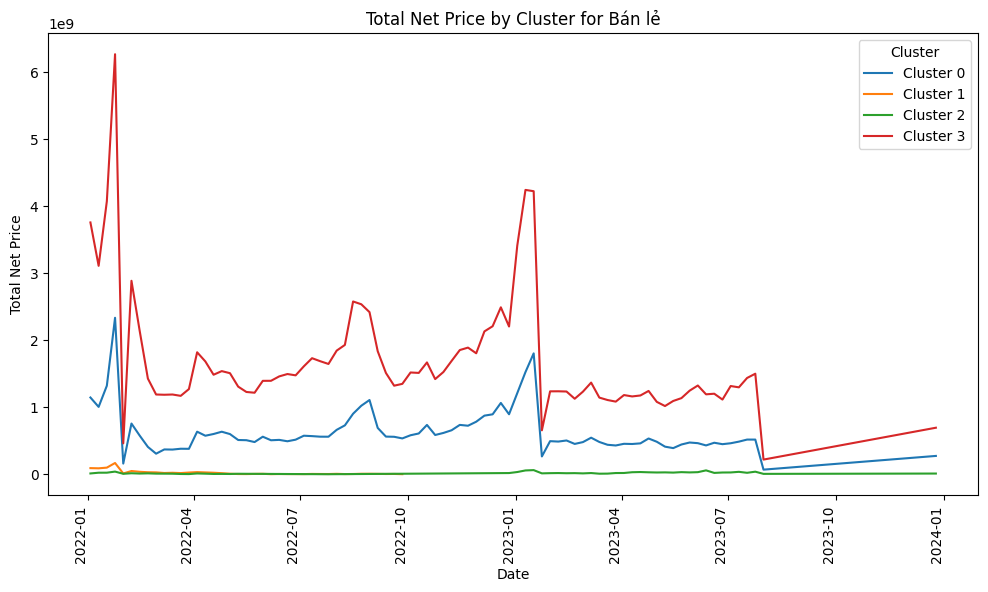

In [136]:
# Set up a single plot
plt.figure(figsize=(12, 6))

# Iterate through clusters and create line plots
for cluster_id in range(4):
    cluster_df = result_df[result_df['cluster'] == cluster_id]
    total_net_price = cluster_df.groupby('week')['net_price'].sum().reset_index()
    
    sns.lineplot(x='week', y='net_price', data=total_net_price, estimator=None, ci=None, label=f'Cluster {cluster_id}')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Total Net Price')
plt.title('Total Net Price by Cluster for Bán lẻ')
plt.legend(title='Cluster')
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()


Cluster 0 is the customer cluster that needs the most priority

**Product Segmentation**

**1. ABC Analysis**

*What are the references that are driving most of the company's sales?*

Product Rotation (using Pareto):
- Very Fast Movers: top 5% (Class A)
- The following 15% of fast movers (Class B)
- The remaining 80% of very slow movers (Class C)

**2. Demand Variability/Stability**

*How stable is the company's customers’ demand?*

- Average Sales: µ
- Standard Deviation: σ
- Coefficient of Variation: CV = σ/µ

For SKUs with a high value of CV, the company may face unstable customer demand that would lead to workload peaks, forecasting complexity and stock-outs.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11620\88478005.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['revenue'] = filtered_data['sold_quantity'] * filtered_data['net_price']


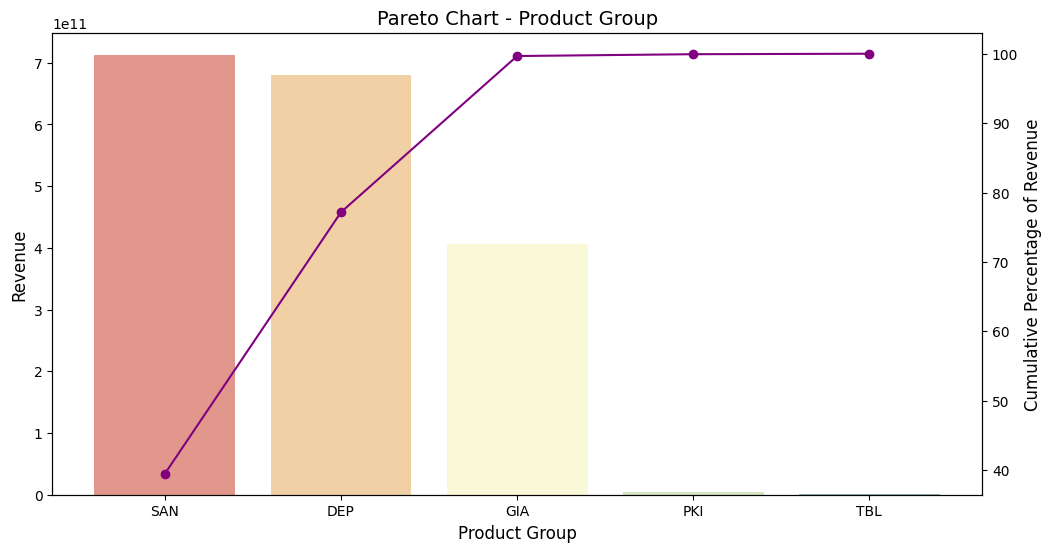

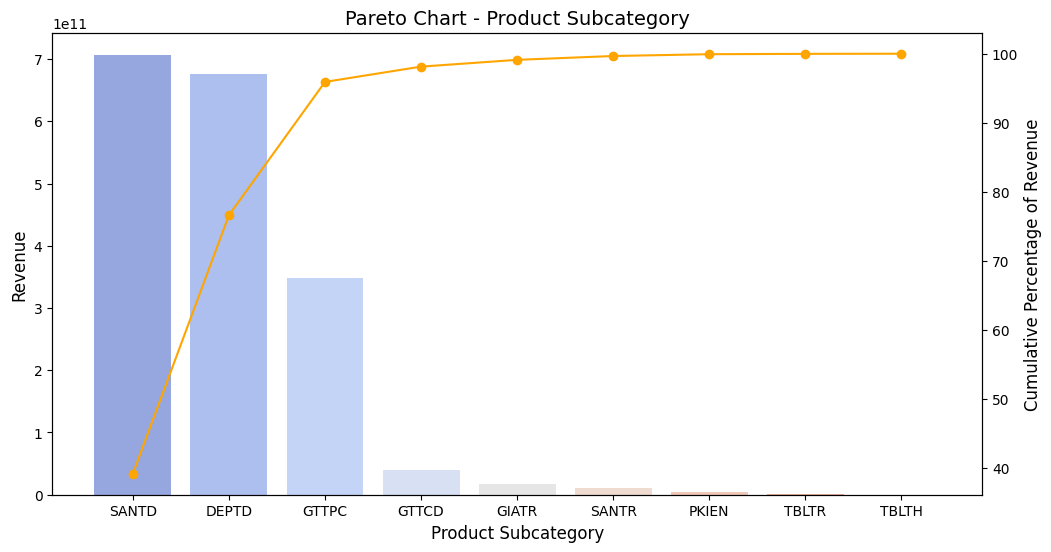

In [137]:
merged_data = pd.merge(sales_frame, master_calendar_df[['YearWeek', 'Year', 'Month']], left_on='week', right_on='YearWeek', how='left')
merged_data = pd.merge(merged_data, df_product_master[['product_id', 'product_group', 'detail_product_group']], on='product_id', how='left')

# Filter data for the years 2022 and 2023 using 'Year'
filtered_data = merged_data[(merged_data['Year'] == 2022) | (merged_data['Year'] == 2023)]

# Calculate revenue (sold_quantity * net_price)
filtered_data['revenue'] = filtered_data['sold_quantity'] * filtered_data['net_price']

# Pareto chart for 'product_group'
product_group_revenue = filtered_data.groupby('product_group')['revenue'].sum().sort_values(ascending=False)
product_group_pareto = product_group_revenue.cumsum() / filtered_data['revenue'].sum() * 100

# Pareto chart for 'detail_product_group'
detail_product_group_revenue = filtered_data.groupby('detail_product_group')['revenue'].sum().sort_values(ascending=False)
detail_product_group_pareto = detail_product_group_revenue.cumsum() / filtered_data['revenue'].sum() * 100

# Seaborn color palette
palette_1 = sns.color_palette("Spectral", len(product_group_revenue))

# Plotting 'product_group' Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=product_group_revenue.index, y=product_group_revenue, palette=palette_1, alpha=0.7, label='Revenue')
ax1.set_xlabel('Product Group', fontsize=12)
ax1.set_ylabel('Revenue', color='black', fontsize=12)
ax1.tick_params('y', colors='black')

ax2 = ax1.twinx()
ax2.plot(product_group_pareto, marker='o', linestyle='-', color='purple', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage of Revenue', color='black', fontsize=12)
ax2.tick_params('y', colors='black')

plt.title('Pareto Chart - Product Group', fontsize=14)
plt.show()

# Seaborn color palette
palette_2 = sns.color_palette("coolwarm", len(detail_product_group_revenue))

# Plotting 'detail_product_group' Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=detail_product_group_revenue.index, y=detail_product_group_revenue, palette=palette_2, alpha=0.7, label='Revenue')
ax1.set_xlabel('Product Subcategory', fontsize=12)
ax1.set_ylabel('Revenue', color='black', fontsize=12)
ax1.tick_params('y', colors='black')

ax2 = ax1.twinx()
ax2.plot(detail_product_group_pareto, marker='o', linestyle='-', color='orange', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage of Revenue', color='black', fontsize=12)
ax2.tick_params('y', colors='black')

plt.title('Pareto Chart - Product Subcategory', fontsize=14)
plt.show()

Based on the two Pareto charts above, it can be observed that both product groups SAN and DEP collectively contribute to 80% of the revenue, with their respective subcategories being SANTD and DEPTD. This implies a high concentration of revenue in these product groups and subcategories. These Pareto charts serve as a useful instrument for identifying and prioritizing the most important contributors to overall revenue, allowing for more targeted strategies and resource allocation.

In [138]:
# Group by 'product_id' and calculate total sales
product_sales = sales_frame.groupby('product_id')['sold_quantity'].sum().reset_index()

# Assuming 'product_id' is a common column between product_sales and df_product_master
merged_product_info = pd.merge(product_sales, df_product_master[['product_id', 'product_group', 'detail_product_group']], on='product_id', how='left')

# Add product_group and product_subcategory columns next to product_id
product_sales = pd.concat([product_sales[['product_id']], merged_product_info[['product_group', 'detail_product_group']], product_sales.drop('product_id', axis=1)], axis=1)

# Calculate the contribution of each product to total turnover
total_turnover = product_sales['sold_quantity'].sum()
product_sales['contribution'] = product_sales['sold_quantity'] / total_turnover

# Sort products by contribution in descending order
product_sales = product_sales.sort_values('contribution', ascending=False)

# Calculate cumulative contribution
product_sales['cumulative_contribution'] = product_sales['contribution'].cumsum()

# ABC on SKU turnover percentage
n_sku = len(product_sales)
n_a, n_b = int(0.05 * n_sku), int(0.2 * n_sku)

# Assign ABC categories based on cumulative contribution
product_sales['class'] = pd.cut(product_sales['cumulative_contribution'], bins=[0, 0.05, 0.2, 1.0], labels=['A', 'B', 'C'])

# Assign SKU percentage based on the total number of SKUs
product_sales['SKU_%'] = (100 * pd.Series(range(1, len(product_sales) + 1)) / len(product_sales))

# Assign products that are not 'A' or 'B' to 'C'
product_sales.loc[product_sales['class'].isnull(), 'class'] = 'C'

In [139]:
product_sales

,product_id,product_group,detail_product_group,sold_quantity,contribution,cumulative_contribution,class,SKU_%
25064,d3be75230d9a4b558e6ec94bddac291cNAU43,DEP,DEPTD,3312,0.002820,0.002820,A,82.540258
25611,d86bc2002a4e458db33b6ceecde3ccb1NAU42,DEP,DEPTD,2961,0.002521,0.005341,A,84.341555
5477,2ec3da3a2df04f8f93084401638005ddNAU40,DEP,DEPTD,2899,0.002468,0.007809,A,18.039319
12441,69a98e7d95254720987f31519d14c9ccDEN25,PKI,PKIEN,2640,0.002248,0.010057,A,40.972108
4060,22a5b61cdd0c4be79aee2d098df03139NAU39,DEP,DEPTD,2595,0.002209,0.012266,A,13.373069
...,...,...,...,...,...,...,...,...
15308,81573b191a02429dadda9428e9b24c4cNAU30,SAN,SANTD,-2,-0.000002,1.000013,C,50.413278
30358,fff116f43dd8455e8ee2c5423c5db50eHOG28,GIA,GTTPC,-3,-0.000003,1.000010,C,99.973656
7185,3d642155dae84692b29b69fe541ed052XNH33,GIA,GTTPC,-3,-0.000003,1.000008,C,23.663846
27220,e5f9126adced448a9f0f29e95c086de8XMN40,GIA,GTTPC,-4,-0.000003,1.000004,C,89.640070


In [140]:
# Top 20 rows for Class A
product_sales[product_sales['class'] == 'A'].head(20)

,product_id,product_group,detail_product_group,sold_quantity,contribution,cumulative_contribution,class,SKU_%
25064,d3be75230d9a4b558e6ec94bddac291cNAU43,DEP,DEPTD,3312,0.002820,0.002820,A,82.540258
25611,d86bc2002a4e458db33b6ceecde3ccb1NAU42,DEP,DEPTD,2961,0.002521,0.005341,A,84.341555
5477,2ec3da3a2df04f8f93084401638005ddNAU40,DEP,DEPTD,2899,0.002468,0.007809,A,18.039319
12441,69a98e7d95254720987f31519d14c9ccDEN25,PKI,PKIEN,2640,0.002248,0.010057,A,40.972108
4060,22a5b61cdd0c4be79aee2d098df03139NAU39,DEP,DEPTD,2595,0.002209,0.012266,A,13.373069
24720,d0b571578bc042cca688ec92debbedc4NAU41,DEP,DEPTD,2559,0.002179,0.014445,A,81.407449
22912,c116b86ccda5469e8f5657c53bcc61baDEN41,DEP,DEPTD,2442,0.002079,0.016524,A,75.453617
3439,1d44608ac67945c1a92447e24dd7101aDEN42,DEP,DEPTD,2409,0.002051,0.018575,A,11.328086
3442,1d49fa08085544b8a8e31d5df4d4993fDEN43,DEP,DEPTD,2302,0.001960,0.020535,A,11.337966
1560,0ce8e8f9a91a4af681560e460926217dOOO35,PKI,PKIEN,2279,0.001940,0.022476,A,5.140449


In [141]:
# Top 20 rows for Class B
product_sales[product_sales['class'] == 'B'].head(20)

,product_id,product_group,detail_product_group,sold_quantity,contribution,cumulative_contribution,class,SKU_%
18019,97d00a18491b4fb68c174cda3c6c1494XAM42,DEP,DEPTD,1129,0.000961,0.050215,B,59.340732
18555,9c20222491ab4b1a871329c87a1ad8aeXAM36,DEP,DEPTD,1126,0.000959,0.051173,B,61.105806
25204,d4eebb603bc04a2f83d0c62f6e684049XNH36,DEP,DEPTD,1108,0.000943,0.052117,B,83.001284
7023,3be94d1a82af43fdbbfc788943ad22b2XAM25,PKI,PKIEN,1100,0.000937,0.053053,B,23.130372
20735,ae8cb146c79647b7afdb56f7dd0de47eKEM37,SAN,SANTD,1077,0.000917,0.053970,B,68.284651
20047,a9088af9e09d493d87520394469dfa63XAM40,DEP,DEPTD,1069,0.000910,0.054881,B,66.019034
13234,70a6162079e94fedb2cfc0bc402f8968XNH43,DEP,DEPTD,1060,0.000903,0.055783,B,43.583495
17131,90b7cb2574db4736b9f88602a8177d36XAM39,DEP,DEPTD,1031,0.000878,0.056661,B,56.416505
9219,4e9edf53cb984d0f94f8a0e1a3230fe4XAM39,DEP,DEPTD,976,0.000831,0.057492,B,30.361906
2624,160a5ab02e6b4a8e8c1ea2c002c53654XAM43,DEP,DEPTD,972,0.000828,0.058319,B,8.644252


In [142]:
# Top 20 rows for Class C
product_sales[product_sales['class'] == 'C'].head(20)

,product_id,product_group,detail_product_group,sold_quantity,contribution,cumulative_contribution,class,SKU_%
24210,cc591e0364ad4d3a866725e9ac74ea68DEN41,SAN,SANTD,279,0.000238,0.200095,C,79.727994
7563,40a283098adc48fea150da912ffd672cDEN37,DEP,DEPTD,278,0.000237,0.200331,C,24.908618
13207,70781f15009b485c9bc188974ca9ddc8DEN37,DEP,DEPTD,278,0.000237,0.200568,C,43.494583
13968,76817fd014ef47adacc5b3a2825a6baeDEN36,SAN,SANTD,277,0.000236,0.200804,C,46.000593
10062,55a329a04d324d739bd037731585ed09DEN36,SAN,SANTD,276,0.000235,0.201039,C,33.137946
29593,f97030c471d3438584f5a59b37c8637dDEN39,DEP,DEPTD,276,0.000235,0.201274,C,97.454474
21923,b8331dd9cdfc48c99ddbdc6b6f78df58NAL42,SAN,SANTD,276,0.000235,0.201509,C,72.196793
29002,f491724b77dc4e5ab7aa0b2fb8d8f947TIM30,SAN,SANTD,276,0.000235,0.201744,C,95.508282
13216,708bcb7cc5f143d68f9af0cc5ea32dfaTRG43,GIA,GTTPC,276,0.000235,0.201979,C,43.524220
29391,f7a5c4f8e3f64391a6b32b7434073ccbXAM36,SAN,SANTD,276,0.000235,0.202214,C,96.789278


Visualization

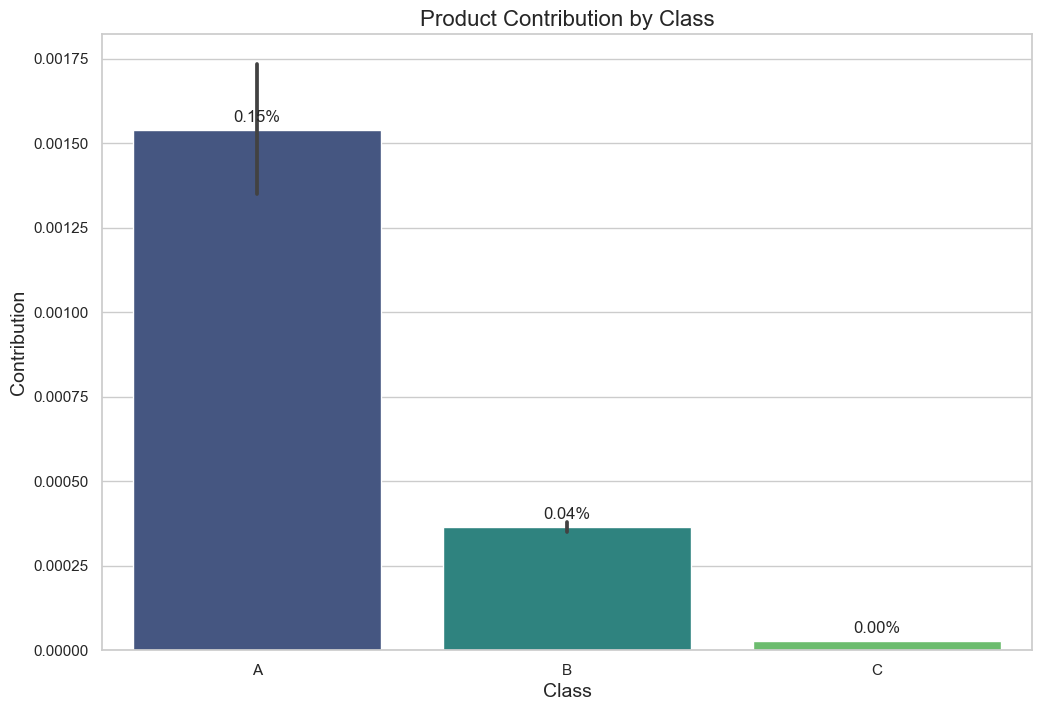

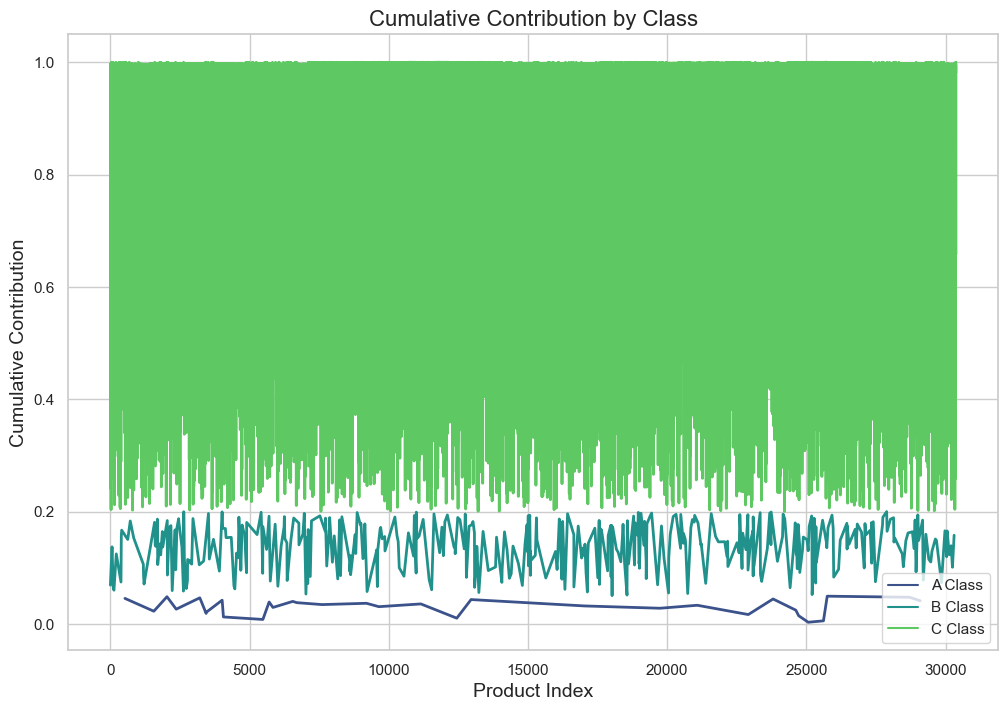

In [143]:
sns.set(style="whitegrid")

# Plotting bar plot for product contribution by class
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="class", y="contribution", data=product_sales, palette="viridis")
plt.title("Product Contribution by Class", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Contribution", fontsize=14)

# Add annotations for each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2%'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points', 
                     fontsize=12)

plt.show()

# Plotting cumulative percentage plot for product contribution
plt.figure(figsize=(12, 8))
lineplot = sns.lineplot(x=product_sales.index, y=product_sales['cumulative_contribution'], hue="class", data=product_sales, palette="viridis", linewidth=2)
plt.title("Cumulative Contribution by Class", fontsize=16)
plt.xlabel("Product Index", fontsize=14)
plt.ylabel("Cumulative Contribution", fontsize=14)
plt.legend(title="Class", fontsize=12)

# Customize legend labels
for line, label in zip(lineplot.lines, lineplot.legend().texts):
    label.set_text(label.get_text() + ' Class')

plt.show()

The graph shows that A Class makes the largest contribution to the cumulative total, followed by B Class and then C Class. For example, at product index 10,000, A Class has contributed about 0.6 to the cumulative total, while B Class has contributed about 0.2 and C Class has contributed about 0.1.

Overall, the graph shows that the classes are not contributing equally to the cumulative total. A Class is making the largest contribution, followed by B Class and then C Class.

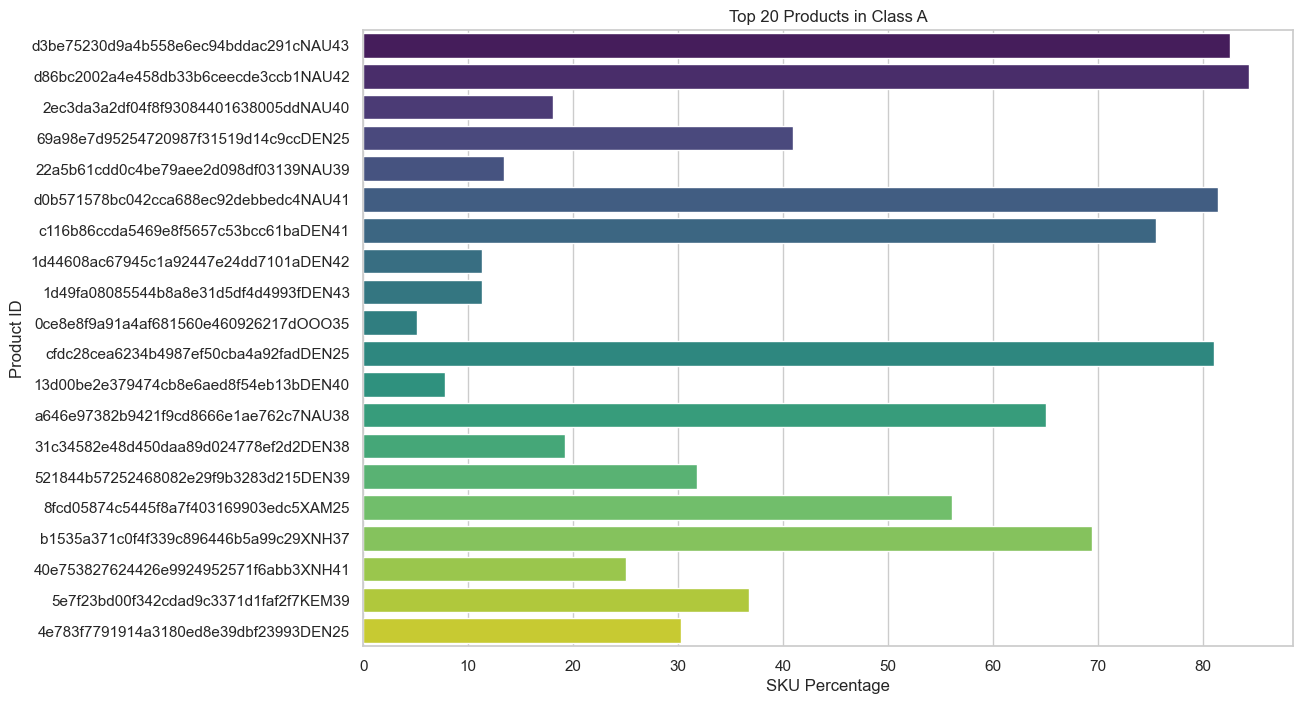

In [144]:
sns.set(style="whitegrid")

# Top 20 rows for Class A
plt.figure(figsize=(12, 8))
sns.barplot(x="SKU_%", y="product_id", data=product_sales[product_sales['class'] == 'A'].head(20), palette="viridis")
plt.title("Top 20 Products in Class A")
plt.xlabel("SKU Percentage")
plt.ylabel("Product ID")
plt.show()

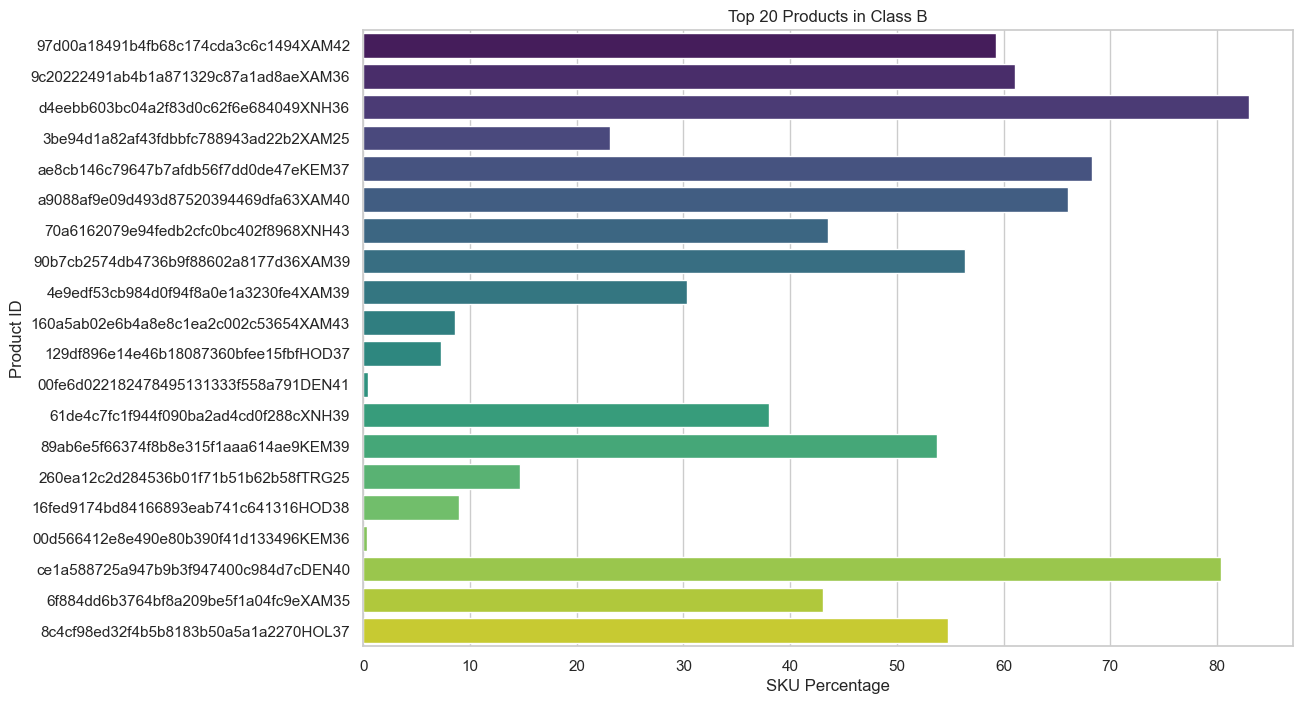

In [145]:
sns.set(style="whitegrid")

# Top 20 rows for Class B
plt.figure(figsize=(12, 8))
sns.barplot(x="SKU_%", y="product_id", data=product_sales[product_sales['class'] == 'B'].head(20), palette="viridis")
plt.title("Top 20 Products in Class B")
plt.xlabel("SKU Percentage")
plt.ylabel("Product ID")
plt.show()

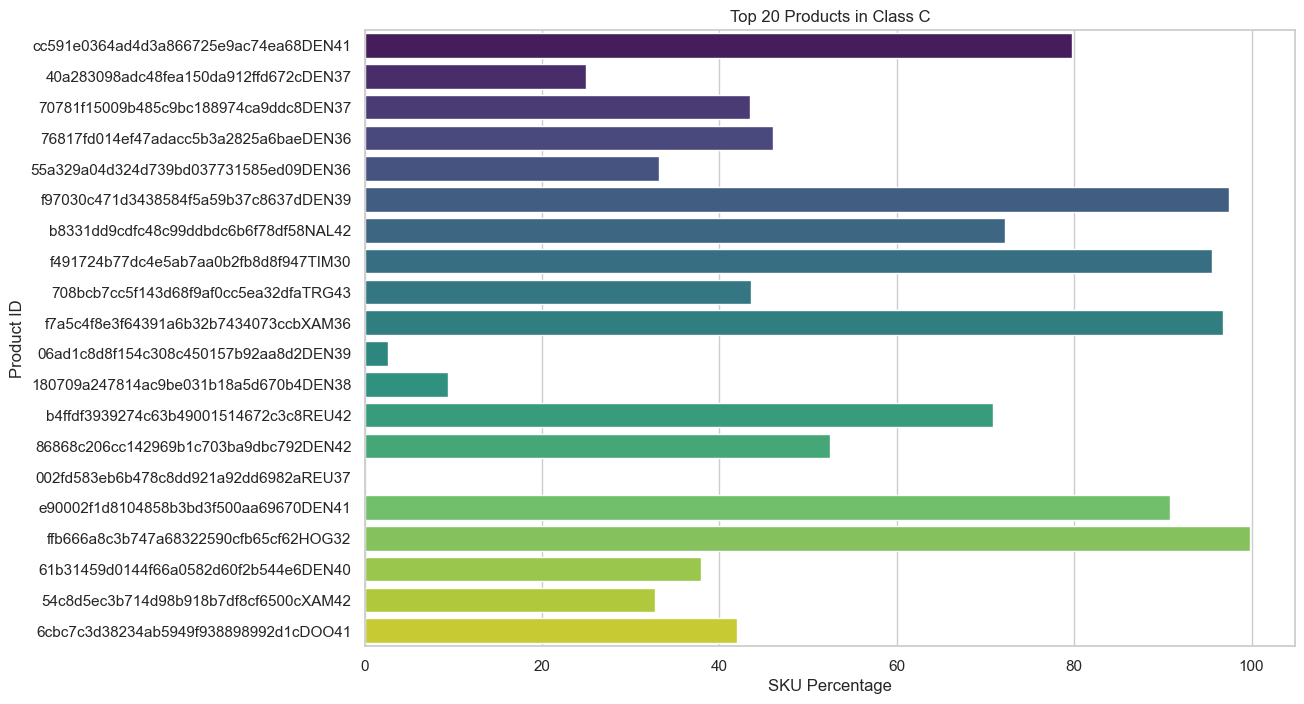

In [146]:
sns.set(style="whitegrid")

# Top 20 rows for Class C
plt.figure(figsize=(12, 8))
sns.barplot(x="SKU_%", y="product_id", data=product_sales[product_sales['class'] == 'C'].head(20), palette="viridis")
plt.title("Top 20 Products in Class C")
plt.xlabel("SKU Percentage")
plt.ylabel("Product ID")
plt.show()